# E-SHOPPING MARKETING ANALYSIS


Continuamos con al segunda parte del proyecto, en la que se desarrollarán los análisis correlacionales entre variables y se aplicarán varios modelos supervisados y no supervisados. En primer lugar, realizaré una clusterización con K-means y posteriormente implementaré un modelo de asociación basado en la venta cruzada, que recomiende productos complementarios o relacionados con el producto qeu el cliente ya ha comprado o está interesado en comprar. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   year               165474 non-null  int64 
 1   month              165474 non-null  int64 
 2   day                165474 non-null  int64 
 3   clics              165474 non-null  int64 
 4   country            165474 non-null  int64 
 5   session_ID         165474 non-null  int64 
 6   category           165474 non-null  int64 
 7   clothing_code      165474 non-null  object
 8   colour             165474 non-null  int64 
 9   location           165474 non-null  int64 
 10  model_photography  165474 non-null  int64 
 11  price              165474 non-null  int64 
 12  overpriced         165474 non-null  int64 
 13  page               165474 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 17.7+ MB


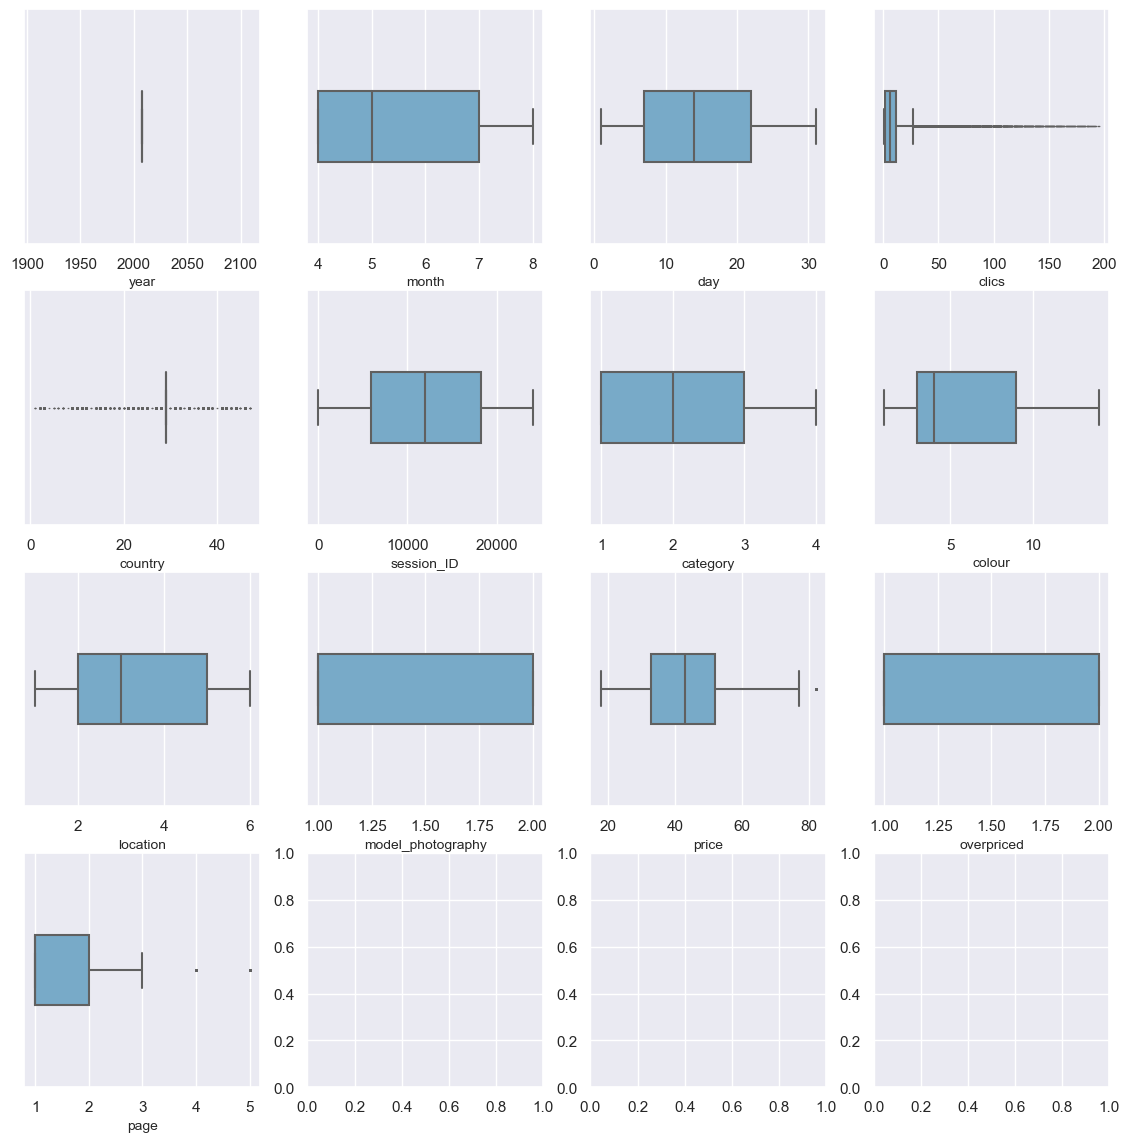

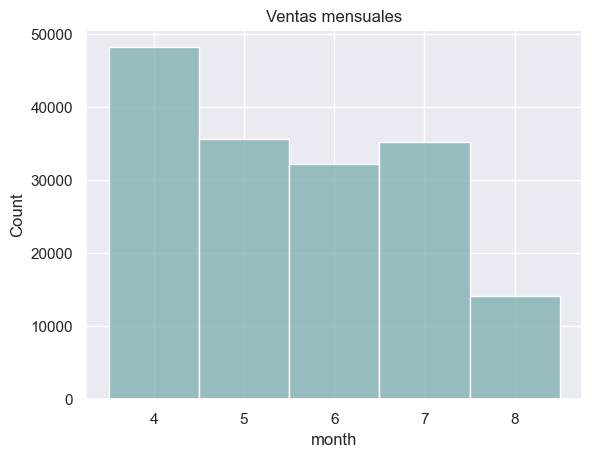

C:\Users\Paula Pareja\AppData\Local\Temp\ipykernel_6548\2981898206.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category = df.groupby('month')['month','category'].value_counts()


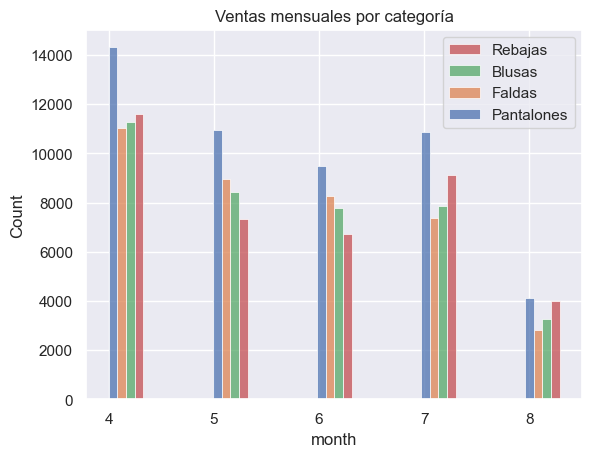

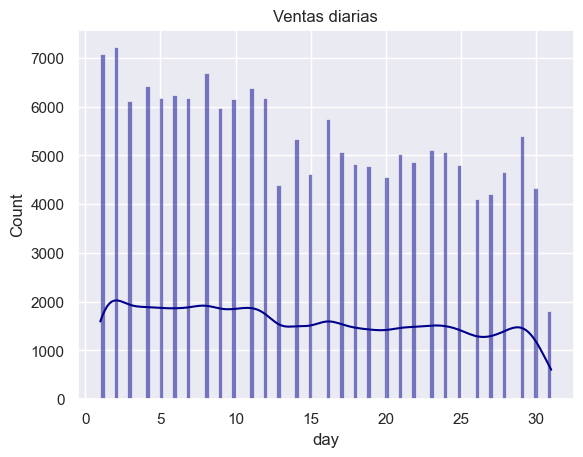

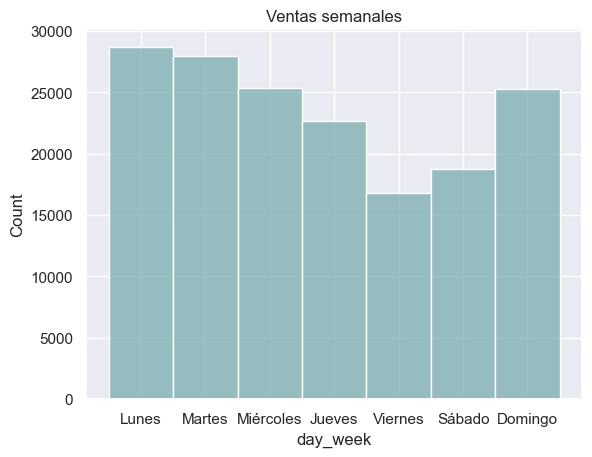

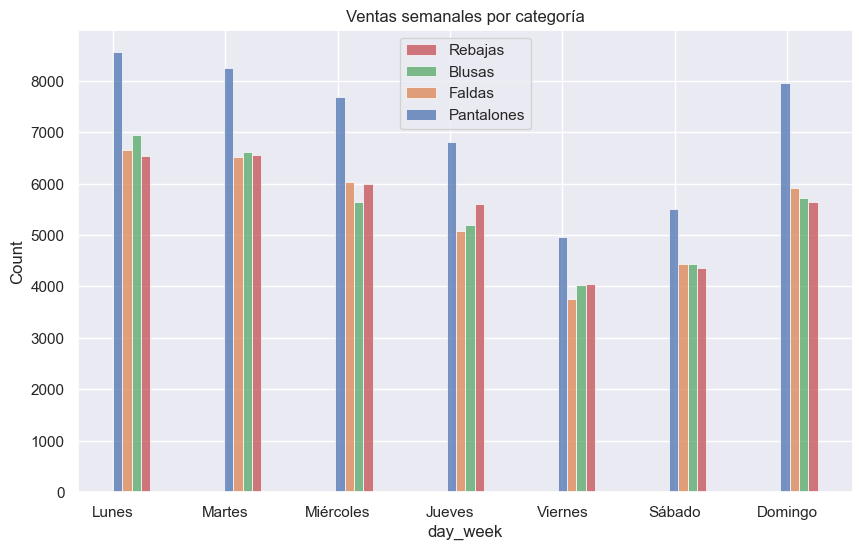

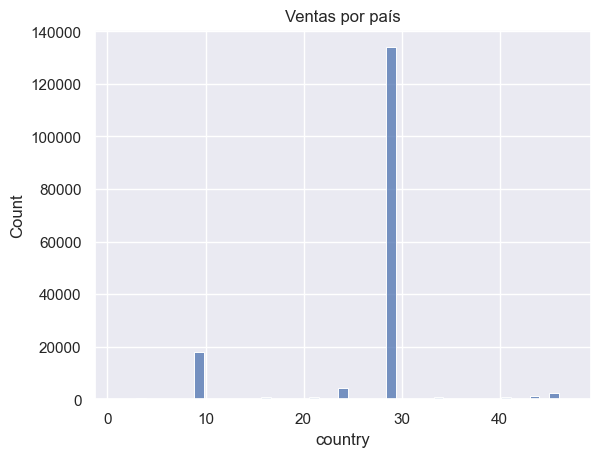

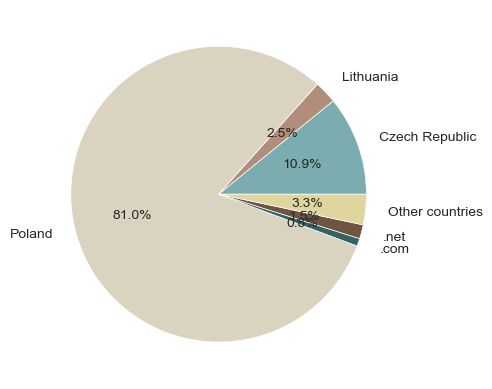

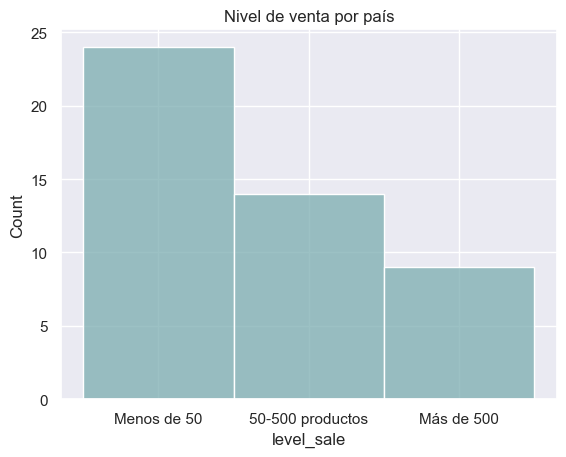

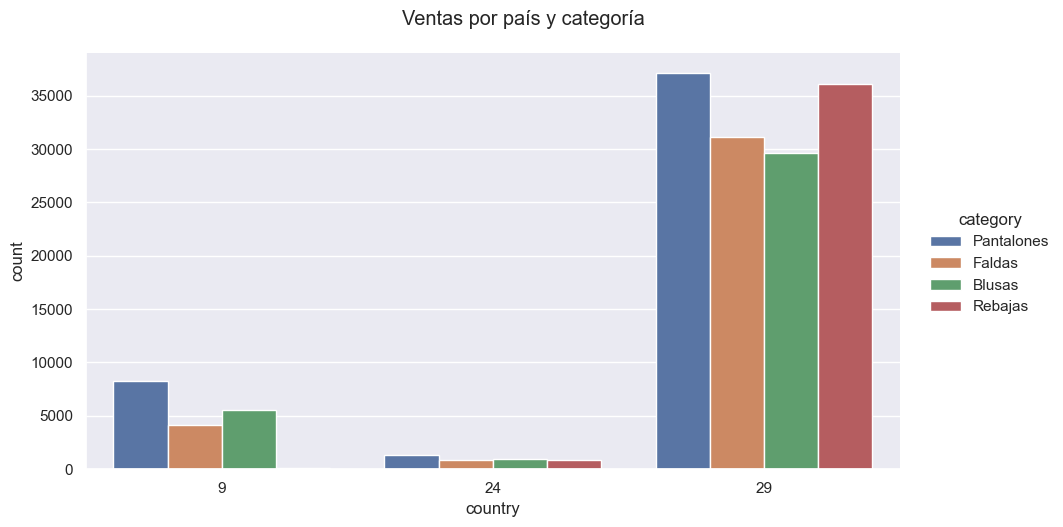

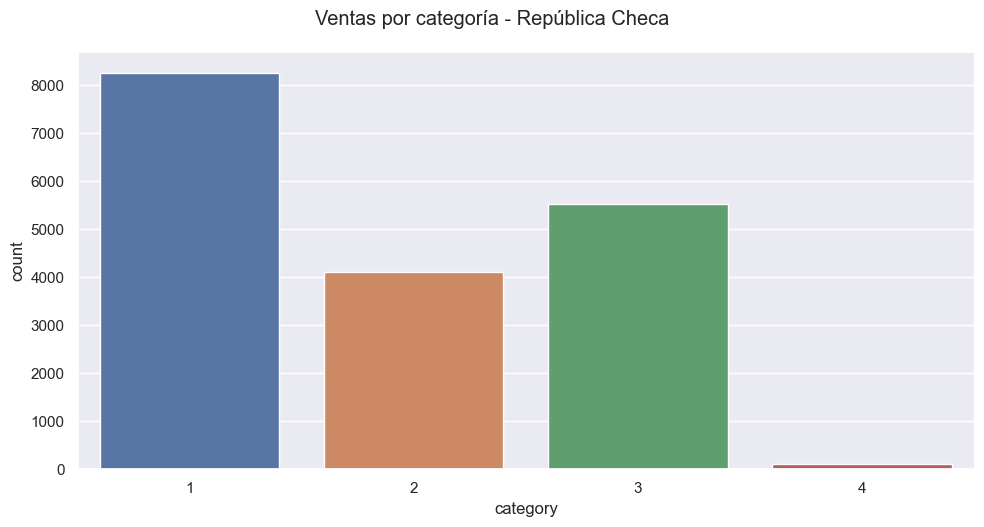

El número de ventas para la categoría rebajas en República Checa es: 0


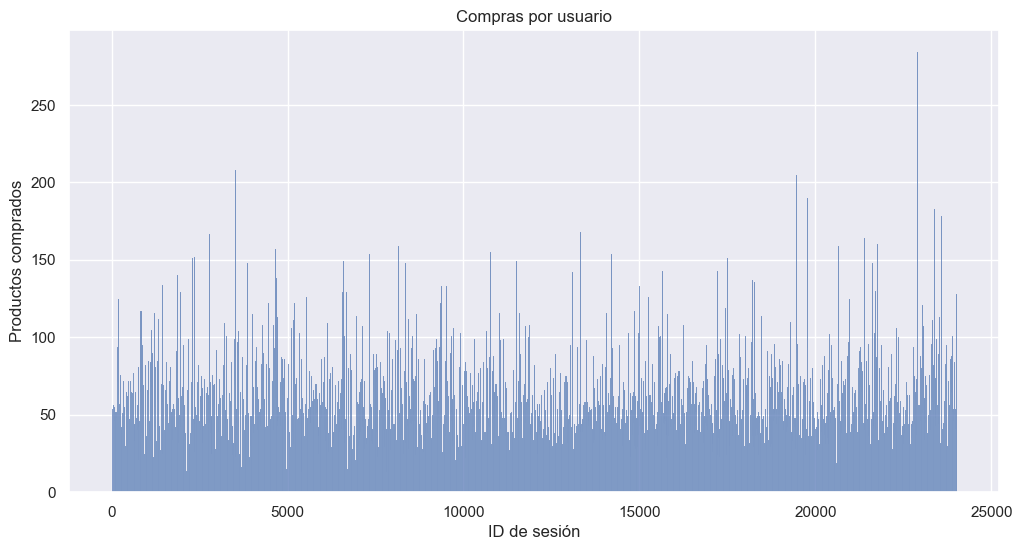

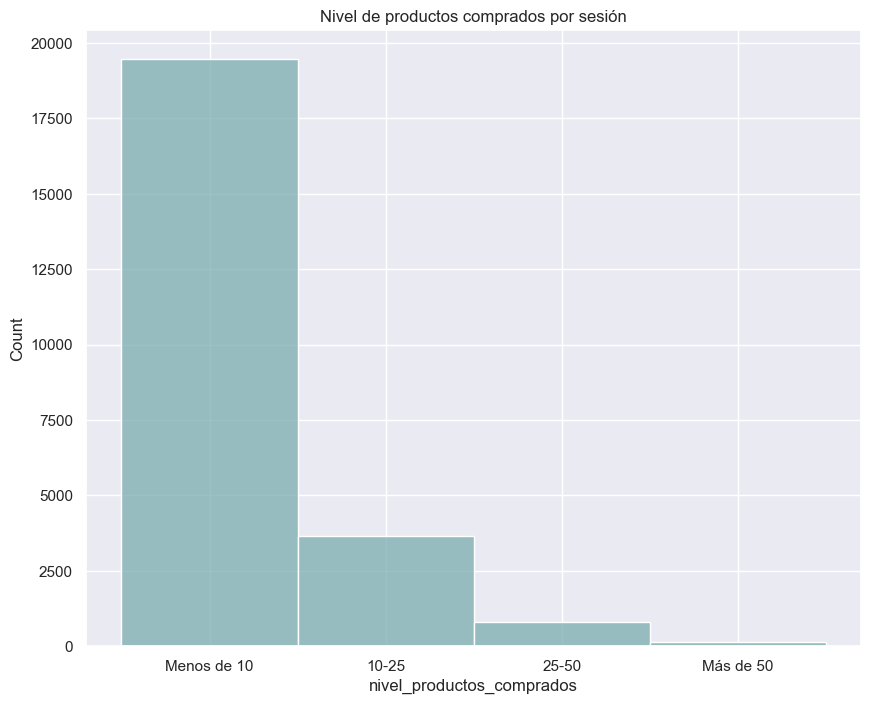

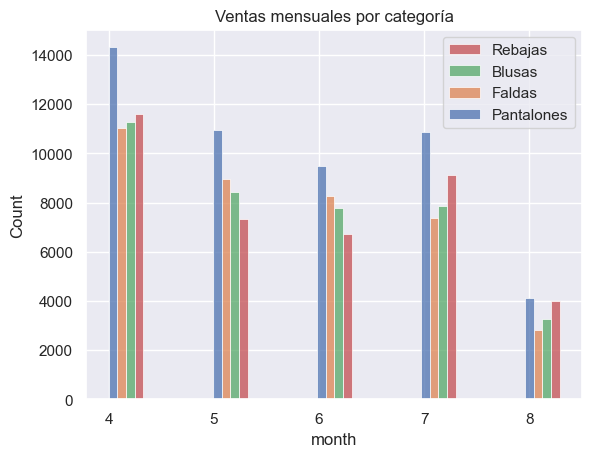

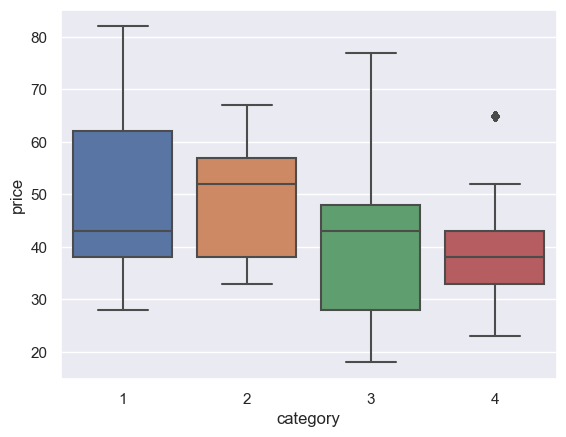

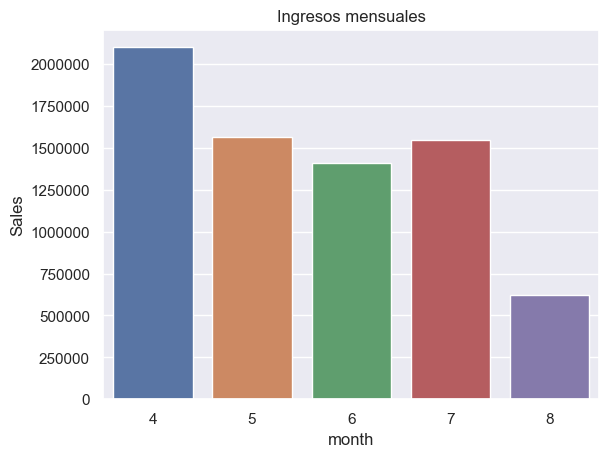

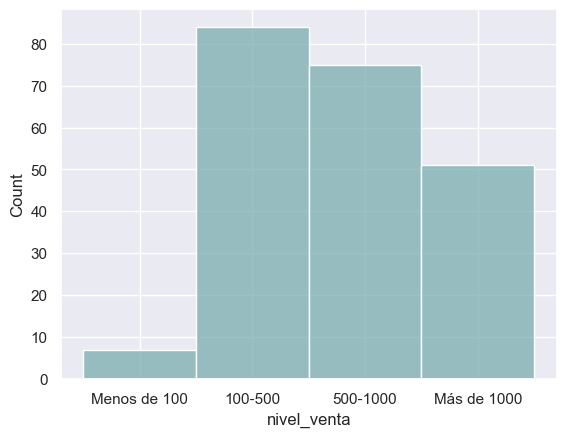

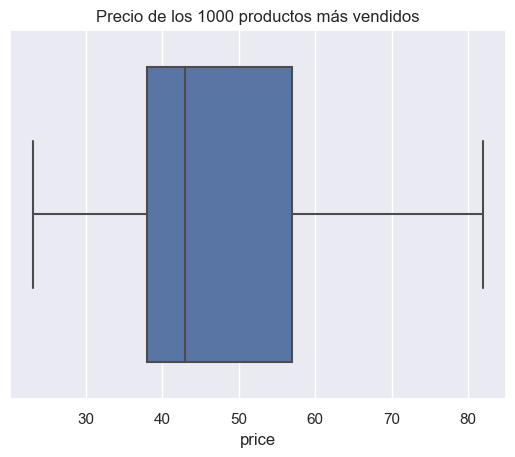

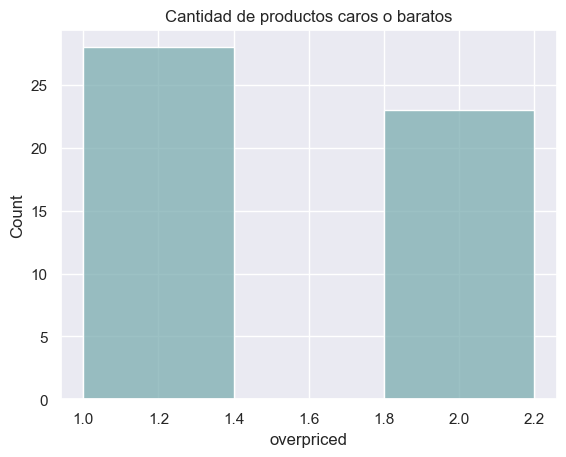

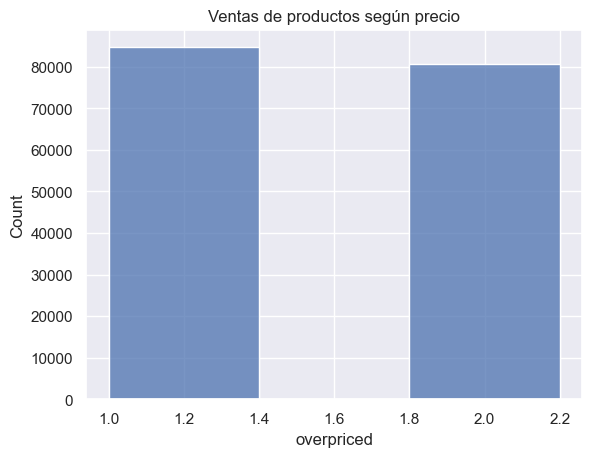

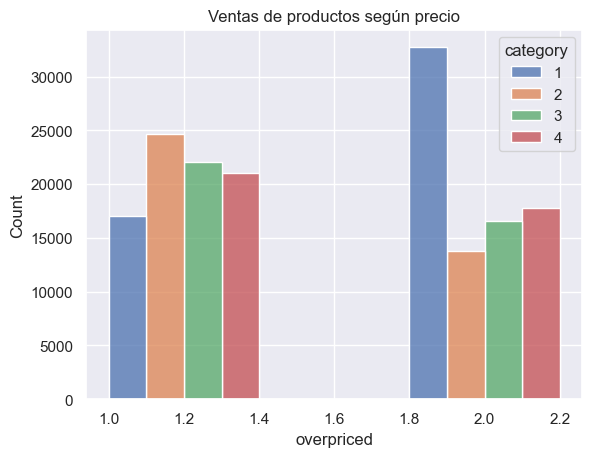

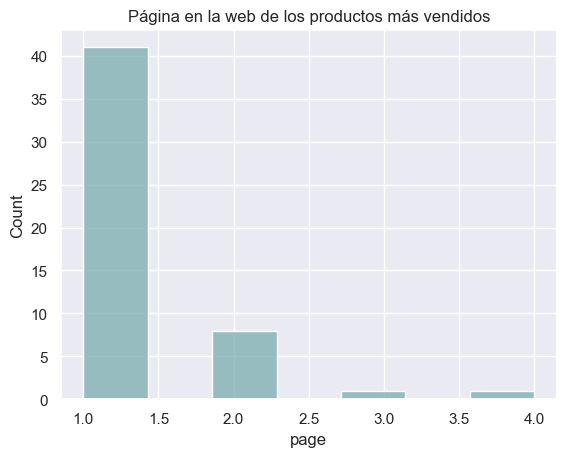

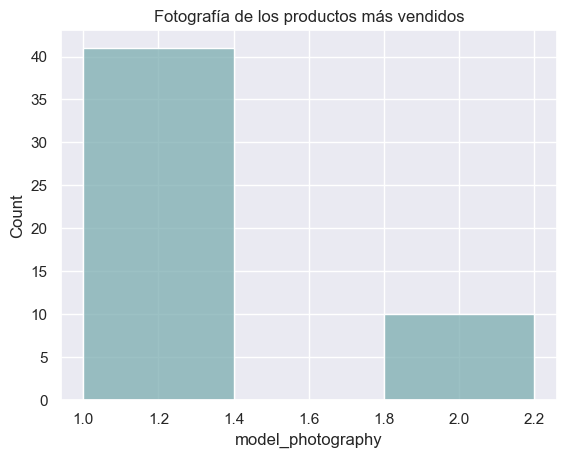

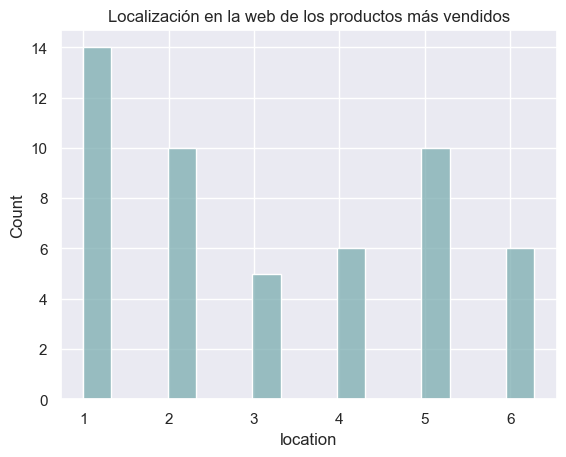

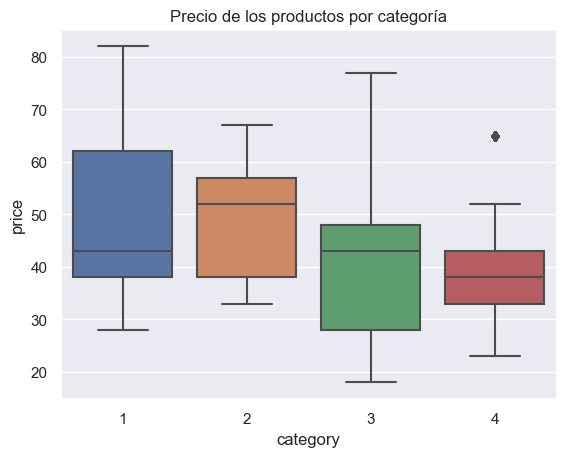

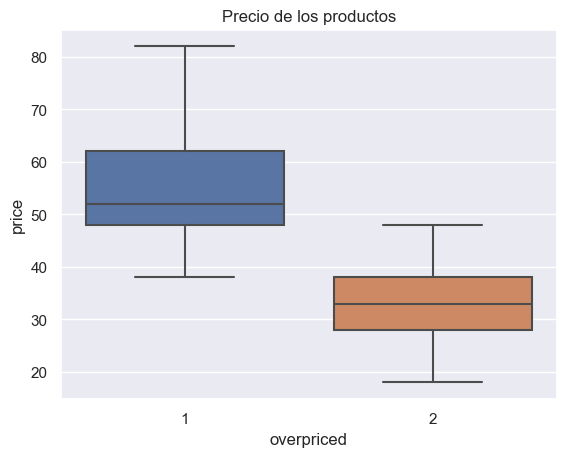

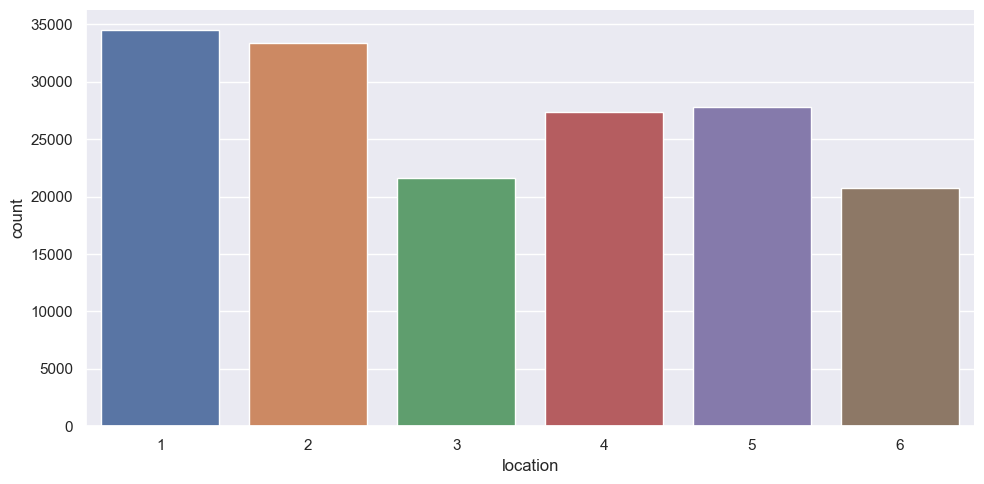

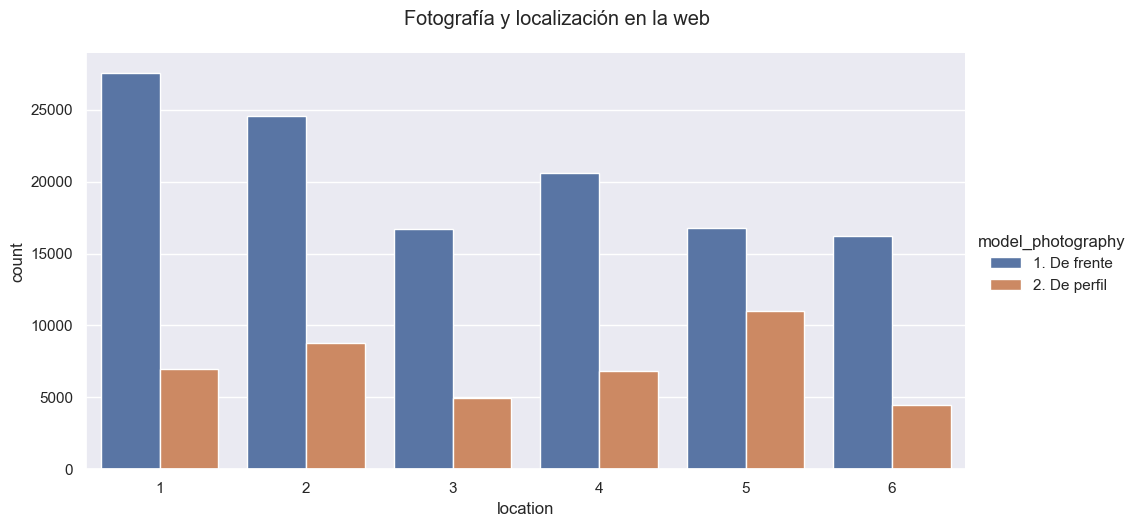

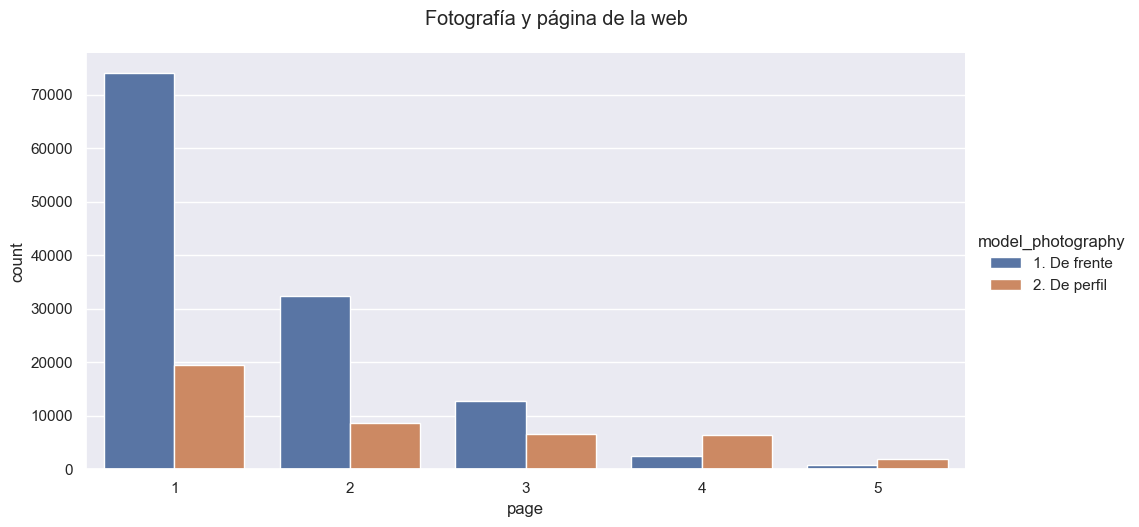

In [1]:
#Importo el notebook anterior

%run ProyectoPEBA_PaulaPareja.ipynb


In [2]:
#Recordamos la forma del df
df.head(5)

,year,month,day,clics,country,session_ID,category,clothing_code,colour,location,model_photography,price,overpriced,page,date,day_week
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1,2008-04-01,martes
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1,2008-04-01,martes
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1,2008-04-01,martes
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1,2008-04-01,martes
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1,2008-04-01,martes


In [3]:
#De igual modo visualizamos el df con variables numéricas
dfnum.head(5)

,year,month,day,clics,country,session_ID,category,colour,location,model_photography,price,overpriced,page
0,2008,4,1,1,29,1,1,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,4,3,2,52,1,1


In [4]:
#Vamos a quitar también la columna year (ya que este no varía)
dfnum_correlations = dfnum.drop(columns = ['year'])
dfnum_correlations

#Nos quedamos con 12 columnas

,month,day,clics,country,session_ID,category,colour,location,model_photography,price,overpriced,page
0,4,1,1,29,1,1,1,5,1,28,2,1
1,4,1,2,29,1,1,1,6,1,33,2,1
2,4,1,3,29,1,2,10,2,1,52,1,1
3,4,1,4,29,1,2,6,6,2,38,2,1
4,4,1,5,29,1,2,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,8,13,1,29,24024,2,2,4,1,67,1,1
165470,8,13,1,9,24025,1,3,4,1,62,1,1
165471,8,13,1,34,24026,1,3,1,1,43,2,1
165472,8,13,2,34,24026,3,12,1,1,43,1,1


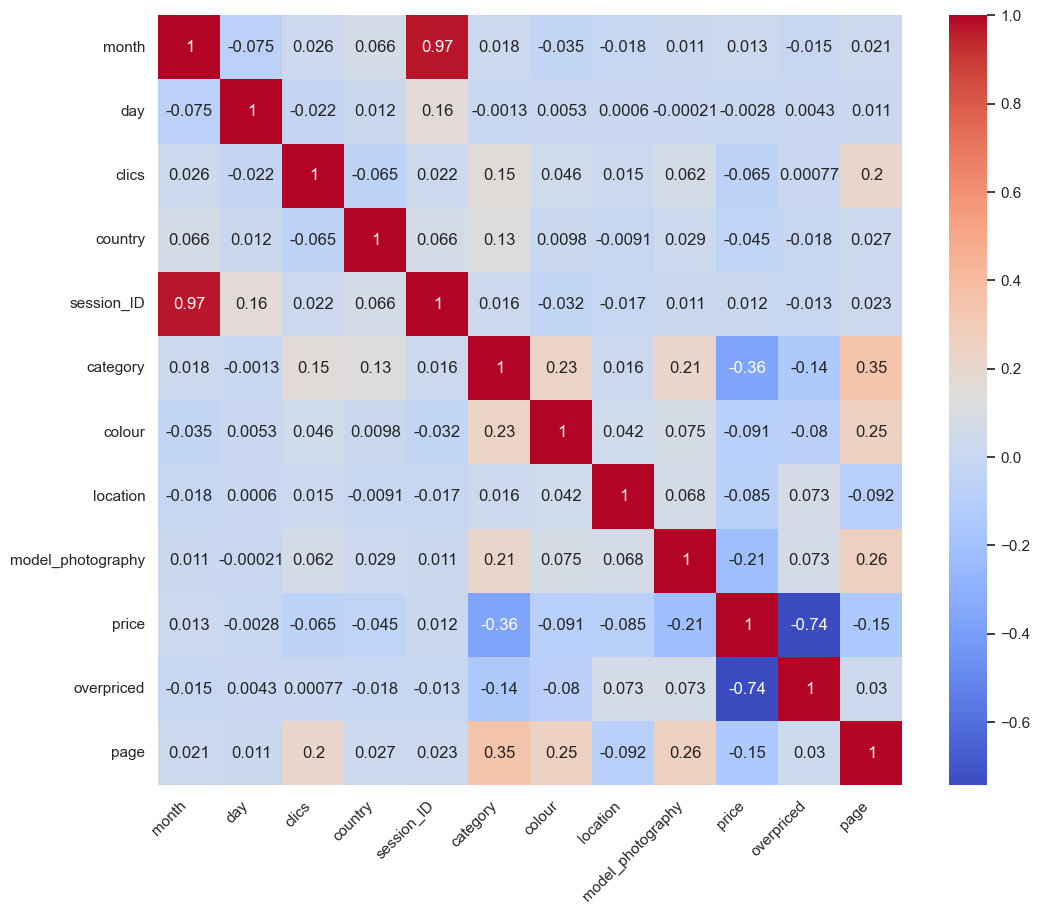

In [5]:
# Computamos las matrices de correlación
corr_matrix = dfnum_correlations.corr()

# Creamos una figura con el tamaño necesario
fig, ax = plt.subplots(figsize=(12, 10))

# Creamos la gráfica de calor con las matrices de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Rotamos los labels de eje x para que puedan leerse correctamente
plt.xticks(rotation=45, ha='right')

# Visualizamos la gráfica
plt.show()


Primer análisis de las correlaciones entre variables: 
- Las variables mes y ID de sesión tienen la correlación más alta pues cada usuario se va creando en orden numérico según fecha de compra.
- Precio y overpriced también están altamente correlacionadas pues los precios más altos son los que es encuentran por encima del precio medio de su categoría.
- En tercer lugar, precio y categoría tienen una correlación de -0.36, la veremos en detalle.
- Página y categoría tienen un alto grado de correlación (0.35). También la analizaremos posteriormente
- De igual modo, las siguientes variables que se correlacionan entre sí, en menor medida, son el tipo de fotografía y la página, el color del producto y la página, el color del producto y la categoría, y el tipo de fotografía y la categoría. Curiosamente, el tipo de fotografía y el precio se correlacionan un -0.21. 
- Las demás variables tienen niveles de correlación muy bajos por lo que no es necesario analizarlas en detalle


<AxesSubplot:xlabel='price', ylabel='category'>

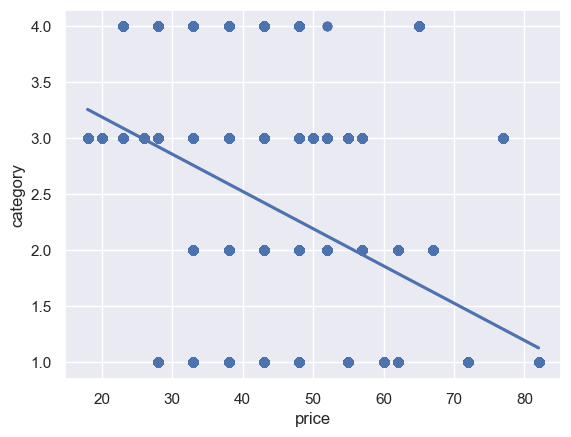

In [30]:
sns.regplot(x=dfnum_correlations["price"], y=dfnum_correlations["category"])

- Existe una ligera correlación entre precio y categoría, siendo los pantalones más caros (1) y las rebajas más baratas (4). Las faldas también son de manera general más caras que las blusas

<AxesSubplot:xlabel='page', ylabel='category'>

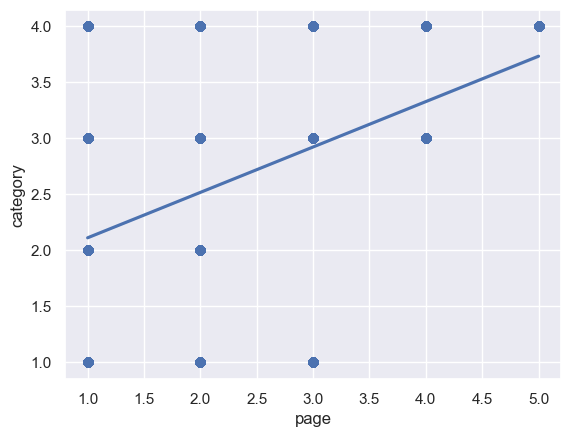

In [31]:
sns.regplot(x=dfnum_correlations["page"], y=dfnum_correlations["category"])

- Podemos observar que en las páginas 4 solo aparecen blusas o rebajas y en la 5 solo rebajas. 
- Hay rebajas en todas las páginas de la web
- Pantalones solo aparece en las páginas 1,2,3 y faldas en la 1 y 2

<AxesSubplot:xlabel='model_photography', ylabel='price'>

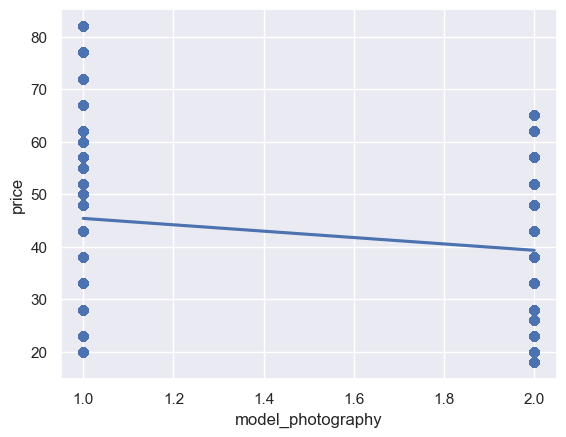

In [32]:
sns.regplot(x=dfnum_correlations["model_photography"], y=dfnum_correlations["price"])

- En el modelo de fotografía, 1 se refiere a las fotografías de frente y 2 a las de perfil
- Es curioso que los productos de más de 65 euros aproximádamente no tienen ninguna foto de perfil

C:\Users\Paula Pareja\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Paula Pareja\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:xlabel='page', ylabel='price'>

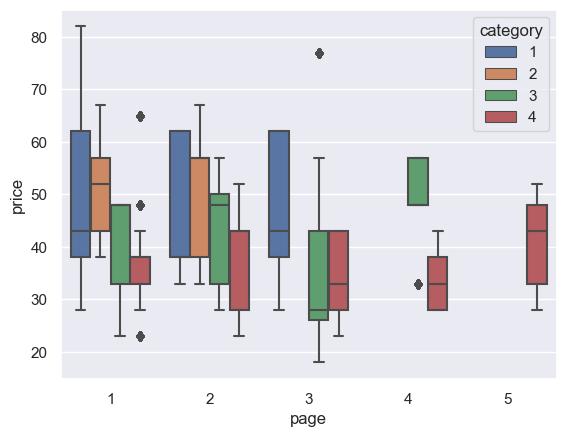

In [33]:
sns.boxplot(data=df, x="page", y="price", hue='category', palette='deep')

- Las mismas categorías de prendas tienen un precio u otro según la página en la que se encuentran
- Por ejemplo, las blusas (categoría 3) solo aparecen con precios más altos en la página 4 y con precios más bajos en la página - Por otro lado, en la página 1 aparecen los precios más altos de pantalones.

In [6]:
#También considero importante realizar un análisis correlacional entre precio y número de clics
#Para ello voy a usar el dataset que cree anteriormente
cliente

,ID,n_products,spend,nivel_productos_comprados
0,1,9,379,Menos de 10
1,2,10,500,Menos de 10
2,3,6,253,Menos de 10
3,4,4,181,Menos de 10
4,5,1,57,Menos de 10
...,...,...,...,...
24021,24022,3,89,Menos de 10
24022,24023,7,246,Menos de 10
24023,24024,1,67,Menos de 10
24024,24025,1,62,Menos de 10


In [7]:
#Añado el número de clics de cada sesión
clicsporcliente = df.groupby('session_ID')['clics'].max()
clicsporcliente


session_ID
1         9
2        10
3         6
4         4
5         1
         ..
24022     3
24023     7
24024     1
24025     1
24026     3
Name: clics, Length: 24026, dtype: int64

In [8]:
cliente['clics'] = clicsporcliente
cliente

,ID,n_products,spend,nivel_productos_comprados,clics
0,1,9,379,Menos de 10,NaN
1,2,10,500,Menos de 10,9.0
2,3,6,253,Menos de 10,10.0
3,4,4,181,Menos de 10,6.0
4,5,1,57,Menos de 10,4.0
...,...,...,...,...,...
24021,24022,3,89,Menos de 10,5.0
24022,24023,7,246,Menos de 10,3.0
24023,24024,1,67,Menos de 10,7.0
24024,24025,1,62,Menos de 10,1.0


In [9]:
#No se añade correctamente porque el índice empieza en 0 
cliente.index = cliente.index + 1
cliente

,ID,n_products,spend,nivel_productos_comprados,clics
1,1,9,379,Menos de 10,NaN
2,2,10,500,Menos de 10,9.0
3,3,6,253,Menos de 10,10.0
4,4,4,181,Menos de 10,6.0
5,5,1,57,Menos de 10,4.0
...,...,...,...,...,...
24022,24022,3,89,Menos de 10,5.0
24023,24023,7,246,Menos de 10,3.0
24024,24024,1,67,Menos de 10,7.0
24025,24025,1,62,Menos de 10,1.0


In [10]:
cliente['clics'] = clicsporcliente
cliente

,ID,n_products,spend,nivel_productos_comprados,clics
1,1,9,379,Menos de 10,9
2,2,10,500,Menos de 10,10
3,3,6,253,Menos de 10,6
4,4,4,181,Menos de 10,4
5,5,1,57,Menos de 10,1
...,...,...,...,...,...
24022,24022,3,89,Menos de 10,3
24023,24023,7,246,Menos de 10,7
24024,24024,1,67,Menos de 10,1
24025,24025,1,62,Menos de 10,1


EL número de clics corresponde al número de productos comprados por sesión ya que es una secuencia numérica ordenada. No nos proporciona información relevante. Como mencioné anteriormente deberíamos añadir el tiempo por sesión y el ID del cliente, no de la sesión. Además, existen herramientas como hotjar que permiten la grabación de pantalla para la mejora del UX/UI. Estos datos son esenciales para un e-commerce, ya que de ellos dependerán el número de ventas, suscripciones y frecuencia de compra.

# 2. Modelos supervisados y no supervisados

En primer lugar, comenzaremos con  un modelo de reglas de asociación con el fin de recomendar productos a los clientes que podrían interesarles y que otros clientes compraron en conjunto. Para ello, vamos a usar la biblioteca "mlxtend" en Python. 

El aprendizaje de reglas de asociación es un método de aprendizaje automático basado en relgas para descubrir relaciones interesantes entre variables en grandes bases de datos. Además de permitirnos analizar las cesta de compra d elos clientes, las reglas de asociación se pueden emplear para la venta cruzada de productos o "cross-selling". 

## 2.1. Modelo reglas de asociación

### 2.1.1. Importación de las librerías y preparación de los datos

In [11]:
#Importamos las librerías necesarias
#pip install mlxtend 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import itertools
from collections import Counter
from itertools import groupby, combinations

In [12]:
df.head(5)

,year,month,day,clics,country,session_ID,category,clothing_code,colour,location,model_photography,price,overpriced,page,date,day_week
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1,2008-04-01,martes
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1,2008-04-01,martes
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1,2008-04-01,martes
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1,2008-04-01,martes
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1,2008-04-01,martes


En primer lugar, recordamos las dimensiones del dataset para entender las compras, productos y ID de sesión que hay:

In [13]:
len(df)

#Como cada fila corresponde a un producto, se vendieron en 165,474 productos en total 

165474

In [14]:
df['session_ID'].nunique()

#Hay 24026 ID de sesión únicos

24026

In [15]:
df['clothing_code'].nunique()

#Hay 217 productos diferentes

217

In [16]:
#Vamos a crear una tabla por ID_session y vamos a quedarnos con los productos que compró cada uno
session = df[['session_ID','clothing_code']]

In [17]:
session.head(5)

,session_ID,clothing_code
0,1,A13
1,1,A16
2,1,B4
3,1,B17
4,1,B8


In [18]:
session.index = session.index + 1

In [19]:
session

,session_ID,clothing_code
1,1,A13
2,1,A16
3,1,B4
4,1,B17
5,1,B8
...,...,...
165470,24024,B10
165471,24025,A11
165472,24026,A2
165473,24026,C2


In [20]:
#Añado cada fila correspondiente al cliente que contiene los códigos de producto que ha comprado
cliente['clothing_codes_combined'] = session.groupby('session_ID')['clothing_code'].agg(lambda x: ','.join(x))

In [21]:
cliente

,ID,n_products,spend,nivel_productos_comprados,clics,clothing_codes_combined
1,1,9,379,Menos de 10,9,"A13,A16,B4,B17,B8,C56,C57,P67,P82"
2,2,10,500,Menos de 10,10,"B31,B21,B24,B27,A10,A10,B27,P1,P34,P33"
3,3,6,253,Menos de 10,6,"B17,C4,C7,C10,C17,P77"
4,4,4,181,Menos de 10,4,"A34,A37,C4,C25"
5,5,1,57,Menos de 10,1,C21
...,...,...,...,...,...,...
24022,24022,3,89,Menos de 10,3,"A1,A13,A15"
24023,24023,7,246,Menos de 10,7,"A10,A18,A15,A16,P11,P18,P13"
24024,24024,1,67,Menos de 10,1,B10
24025,24025,1,62,Menos de 10,1,A11


In [46]:
#Voy a convertir el df en datos binarios para poder implementar el algoritmo a priori

#Primero me quedo solo con las columnas que quiero
model_cliente = cliente[['ID','clothing_codes_combined']]
model_cliente

,ID,clothing_codes_combined
1,1,"A13,A16,B4,B17,B8,C56,C57,P67,P82"
2,2,"B31,B21,B24,B27,A10,A10,B27,P1,P34,P33"
3,3,"B17,C4,C7,C10,C17,P77"
4,4,"A34,A37,C4,C25"
5,5,C21
...,...,...
24022,24022,"A1,A13,A15"
24023,24023,"A10,A18,A15,A16,P11,P18,P13"
24024,24024,B10
24025,24025,A11


In [47]:
model_cliente.to_excel('model_cliente.xlsx', index=False, encoding='utf-8')

In [48]:
#Ahora voy a dividir los productos por comas y convertirlos en columnas (serán 217 en total)
data = list(model_cliente['clothing_codes_combined'].apply(lambda x:x.split(',')))

In [49]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)

df_model = pd.DataFrame(te_data, columns=te.columns_).astype(bool)
df_model

,A1,A10,A11,A12,A13,A14,A15,A16,A17,A18,...,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
0,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24021,True,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24022,False,True,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
24023,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24024,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


De este modo, nos hemos quedado con una nueva tabla en la que cada sesión tiene marcadas las columnas de los productos que ha comprado. A continuación, vamos a hacer la primera iteración con los valores de soporte para cada producto (frecuencia). 

In [50]:
#Número de veces que se ha comprado cada producto es igual a la frecuencia con la que los elementos aparecen
df_model.sum()

A1     2104
A10    1808
A11    2454
A12    1644
A13    1428
       ... 
P8      599
P80     198
P81     193
P82     663
P9      496
Length: 217, dtype: int64

In [26]:
#El valor de soporte dividiendo los elementos por el número de fila
first = pd.DataFrame(df_model.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
B4,0.019411
A2,0.015453
A11,0.014830
B10,0.014594
P1,0.013694
...,...
P66,0.000266
P79,0.000012
P22,0.000012
P54,0.000006


In [27]:
first.describe()

,Support
count,217.000000
mean,0.004131
std,0.003251
min,0.000006
25%,0.001940
50%,0.003179
75%,0.005300
max,0.019411


- Aquí podemos ver que el support es de media un 0.004, lo cual es bastante bajo ya que tenemos muchos productos
- El percentil 50 es 0.003
- El máximo es 0.019

Por ende, teniendo en cuenta las grandes dimensiones de mi conjunto de datos vamos a establecer un valor de soporte más bajo, de 0.002. Si encuentro demasiados resultados puedo aumentar el valor de soporte, de lo contrario puedo disminuirlo. Por ahora no voy a dejarlo muy alto ya que me interesa tener muchas combinaciones diferentes de productos y recomendaciones para cada uno. De lo contrario, cuando una persona compre un producto con menores ventas (menor frecuencia y por ende soporte) no aparecerán recomendaciones. 

In [28]:
#Nos quedamos con los productos de un soporte mayor de 0.004
first[first.Support >= 0.01]

,Support
B4,0.019411
A2,0.015453
A11,0.014830
B10,0.014594
P1,0.013694
A15,0.013458
A4,0.013440
A1,0.012715
A5,0.011778
A10,0.010926


In [29]:
second = list(itertools.combinations(first.index,2))
second = [list(i) for i in second]

second[:10]

[['B4', 'A2'],
 ['B4', 'A11'],
 ['B4', 'B10'],
 ['B4', 'P1'],
 ['B4', 'A15'],
 ['B4', 'A4'],
 ['B4', 'A1'],
 ['B4', 'A5'],
 ['B4', 'A10'],
 ['B4', 'B13']]

En la serie "second" que hemos creado ya tenemos las combinaciones de productos que se han comprado en pares

In [30]:
#Creamos una función que nos permita introducir diferentes iteraciones según el número de productos que queramos recomendar

def ar_iterations(data, num_iter = 1, support_value = 0.004, iterationIndex = None):
    
    # Next Iterations
    def ar_calculation(iterationIndex = iterationIndex): 
        # Calculation of support value
        value = []
        for i in range(0, len(iterationIndex)):
            result = data.T.loc[iterationIndex[i]].sum() 
            result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
            value.append(result)
        # Bind results
        result = pd.DataFrame(value, columns = ["Support"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x:len(x))
        result = result.set_index("index").sort_values("Support", ascending = False)
        # Elimination by Support Value
        result = result[result.Support > support_value]
        return result    
    
    # First Iteration
    first = pd.DataFrame(df_model.T.sum(axis = 1) / df_model.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
    first = first[first.Support > support_value]
    first["length"] = 1
    
    if num_iter == 1:
        res = first.copy()
        
    # Second Iteration
    elif num_iter == 2:
        
        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)
        
    # All Iterations > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)
    
    return res

In [31]:
iteration1 = ar_iterations(df_model, num_iter=1, support_value=0.01)
iteration1

,Support,length
B4,0.133689,1
A2,0.106426,1
A11,0.102139,1
B10,0.100516,1
P1,0.094314,1
...,...,...
C47,0.010447,1
P63,0.010322,1
C37,0.010281,1
P42,0.010239,1


In [32]:
iteration2 = ar_iterations(df_model, num_iter=2, support_value=0.01)
iteration2

,Support,length
index,,
"(A2, A5)",0.036377,2
"(B10, B13)",0.036294,2
"(A2, A1)",0.035836,2
"(A2, A11)",0.034338,2
"(A2, A3)",0.033797,2
...,...,...
"(A4, C5)",0.010072,2
"(B32, B25)",0.010072,2
"(A15, C5)",0.010031,2


In [33]:
iteration3 = ar_iterations(df_model, num_iter=3, support_value=0.01,
              iterationIndex=iteration2.index)
iteration3

,Support,length
index,,
"(A3, A2, A5)",0.020228,3
"(A3, A2, A1)",0.018272,3
"(A2, A10, A5)",0.017190,3
"(A2, A7, A5)",0.016815,3
"(A8, A2, A5)",0.016607,3
...,...,...
"(A12, A7, A10)",0.010156,3
"(A7, A11, A5)",0.010114,3
"(A12, A1, A5)",0.010114,3


Consigo las iteraciones con un soporte mínimo de 0.01. Ya tenemos los diferentes grupos de productos comprados en conjunto. Prosigo a aplicar y medir las reglas de asociación. 

### 2.1.2. Reglas de asociación

- La función apriori () evalúa el valor de soporte para cada producto.
- La función association_rules () nos ayuda a comprender la relación entre antecedentes y productos de consecuencias. Proporciona información notable sobre los productos.

In [34]:
df_model.dtypes

A1     bool
A10    bool
A11    bool
A12    bool
A13    bool
       ... 
P8     bool
P80    bool
P81    bool
P82    bool
P9     bool
Length: 217, dtype: object

In [35]:
# Apriori
freq_items = apriori(df_model, min_support = 0.01, use_colnames = True)
freq_items.sort_values("support", ascending = False)

,support,itemsets
69,0.133689,(B4)
11,0.106426,(A2)
2,0.102139,(A11)
43,0.100516,(B10)
130,0.094314,(P1)
...,...,...
276,0.010031,"(C5, A15)"
395,0.010031,"(B23, B13)"
644,0.010031,"(A3, A8, A2, A6)"
321,0.010031,"(A4, A41)"


Aquí obtengo los diferentes conjuntos de productos y su valor de soporte, superior a 0.01. En total tenemos 659 reglas en las que se incluyen conjuntos de uno, dos y tres productos que se han comprado en conjunto. 

In [36]:
freq_items.sort_values("support", ascending = False).head(5)

,support,itemsets
69,0.133689,(B4)
11,0.106426,(A2)
2,0.102139,(A11)
43,0.100516,(B10)
130,0.094314,(P1)


In [37]:
freq_items.sort_values("support", ascending = False).tail(5)

,support,itemsets
276,0.010031,"(C5, A15)"
395,0.010031,"(B23, B13)"
644,0.010031,"(A3, A8, A2, A6)"
321,0.010031,"(A4, A41)"
627,0.010031,"(A3, A10, A2, A6)"


In [38]:
# Association Rules & Info
df_ar = association_rules(freq_items, metric = "confidence", min_threshold = 0.5)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(A28),(A31),0.019562,0.047532,0.010364,0.529787,11.145944,0.009434,2.025611,0.928444
1,(B12),(B10),0.053068,0.100516,0.026596,0.501176,4.986031,0.021262,1.803211,0.844241
2,(P2),(P1),0.037751,0.094314,0.022309,0.590959,6.265837,0.018749,2.214169,0.873375
3,(P3),(P1),0.041746,0.094314,0.021518,0.515454,5.465264,0.017581,1.869141,0.852620
4,"(A10, A1)",(A11),0.021102,0.102139,0.011113,0.526627,5.155968,0.008958,1.896731,0.823426
...,...,...,...,...,...,...,...,...,...,...
436,"(A5, A8, A6)",(A9),0.013818,0.066969,0.010239,0.740964,11.064262,0.009314,3.601933,0.922364
437,"(A5, A8, A9)",(A6),0.013652,0.065263,0.010239,0.750000,11.492028,0.009348,3.738949,0.925620
438,"(A5, A6, A9)",(A8),0.014734,0.057105,0.010239,0.694915,12.169121,0.009398,3.090601,0.931550
439,"(A8, A6, A9)",(A5),0.012986,0.081120,0.010239,0.788462,9.719639,0.009185,4.343794,0.908919


- La variable de soporte antecedente nos dice la probabilidad de productos antecedentes solamente
- La variable de soporte de consecuentes nos dice la probabilidad de productos consecuentes solamente
- El valor de soporte es el valor de los dos productos (antecedentes y - consecuencias)
- La confianza es una indicación de la frecuencia con la que se ha determinado que la regla es cierta.
- La relación entre el apoyo observado y el esperado si X e Y fueran independientes.

In [39]:
df_ar[(df_ar.support > 0.01) & (df_ar.confidence > 0.5)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
408,"(A3, A7, A6)",(A5),0.012486,0.081120,0.010946,0.876667,10.806975,0.009934,7.450375,0.918942
278,"(P2, P3)",(P1),0.012362,0.094314,0.010822,0.875421,9.281934,0.009656,7.269962,0.903432
414,"(A3, A8, A6)",(A5),0.012445,0.081120,0.010614,0.852843,10.513290,0.009604,6.244204,0.916285
281,"(A5, A3, A1)",(A2),0.013985,0.106426,0.011862,0.848214,7.969963,0.010374,5.887073,0.886933
380,"(A7, A2, A6)",(A5),0.012611,0.081120,0.010697,0.848185,10.455869,0.009674,6.052620,0.915911
...,...,...,...,...,...,...,...,...,...,...
271,"(B10, B11)",(B13),0.025306,0.074503,0.012695,0.501645,6.733249,0.010809,1.857104,0.873590
207,"(A2, A9)",(A7),0.025639,0.058229,0.012861,0.501623,8.614727,0.011368,1.889678,0.907179
1,(B12),(B10),0.053068,0.100516,0.026596,0.501176,4.986031,0.021262,1.803211,0.844241
15,"(A1, A12)",(A5),0.020186,0.081120,0.010114,0.501031,6.176382,0.008477,1.841556,0.855360


Hemos obtenido 437 reglas de productos relacionados con un support superior a 0.01 y una confianza mayor a 0.5.

Las reglas junto al support, confianza y lift dicen lo siguiente: 
- El valor de soporte nos muestra que la probabilidad de ver compras juntas de los productos A6, A7, A3 y el producto A5 es de 0.01 de todas las compras
- El valor de confianza nos muestra que el 87% de los clientes que compraron A6, A7, A3 también compraron A5
- El valor lift nos muestra que las ventas de A5 aumentan por 10.8 cuando es comprado junto a A6, A7, A3

En este caso, con unos valores tan altos sobre todo de confianza y lift, nos sugiere que dichos productos son complementarios y que los clientes tienen una mayor probabilidad de comparlos juntos. Es decir, es altamente recomendable ofrecerlos en conjunto ya que aumentarán exponencialmente las ventas. Este puede ser el caso de un conjunto deportivo. 

## 2.2. Regresión lineal

Ya tenemos los productos que se han comprado conjuntamente en grupos de 2 y 3 para poder recomendar otros productos al cliente cuando va a realizar una compra. Ahora vamos a implementar otro modelo para identificar qué variables influyeron más en el número de ventas de un producto y hacer posteriormente su clusterización. Todo esto nos va a permitir identificar características de nuestro catálogo de productos que son más atractivas para el cliente y estudiar las relaciones entre las diferentes variables de nuestro dataframe. 

En primer lugar realizamos una regresión lineal que identifique qué variables afectaron más al número de productos vendidos. Contamos con múltiples variables como día del mes, país, categoría, localización en la web, página o precio que pueden afectar negativa o positivamente en nuestra variable objetivo (número de ventas). Al ser una variable constante, implementaremos un modelo de regresión. Teniendo en cuenta la gran mayoría de productos vendidos en Polonia,  si se ralentiza mucho el modelo eliminaremos la variable país. 

Es muy importante considerar que aunque las variables sean de tipo int, en realidad corresponden a valores categóricos y esto puede comprometer las distancias para la regresión y posterior clusterización. Se tendrá esto en cuenta a la hora de implementar los modelos y preparar los datos.  

In [51]:
#En primer lugar, creo un dataset que esté agrupado por producto en el que crearemos una columna llamada "número de ventas". 
#Esta columna será nuestra variable objetivo (V.O.)

producto = df.groupby('clothing_code').agg({
    'price': 'first',
    'colour': 'first',
    'location': 'first',
    'page': 'first',
    'model_photography': 'first',
    'category': 'first',
    'clothing_code': 'count'
})

# renombrar la columna codigo_producto por num_ventas
producto = producto.rename(columns={'clothing_code': 'num_ventas'})

Respecto a las variables que usaré para el análisis:
- No he elegido la columna año pues siempre corresponde a 2008. 
- Tampoco he seleccionado la columna "overpriced" para evitar la multicolinealidad, ya que está altamente relacionada con precio. Lo mismo ocurre con la ID de sesión, con una alta correlación con día y mes ya que se va creando según número de pedido. De lo contrario, estaríamos incluyendo variables redundantes para el modelo y lo único que conseguiríamos sería ralentizarlo. 
- No elegiré la variable country pues la mayoría de las ventas corresponden a Polonia y por ende ya sé que esta variable afectará positivamente al análisis. Además, debemos tener en cuenta que mis variables son categóricas por lo que no tiene sentido usar una variable de 49 valores únicos para la interpretación del análisis. Siendo 29 el país con mayores ventas así como los últimos de la lista saldrá un coeficiente positivo pero no es una variable numérica aunque se entienda como una escala. 

In [52]:
producto

,price,colour,location,page,model_photography,category,num_ventas
clothing_code,,,,,,,
A1,28,8,1,1,1,1,2265
A10,38,3,4,1,1,1,2280
A11,62,3,4,1,1,1,2789
A12,38,2,4,1,1,1,2010
A13,28,1,5,1,1,1,1577
...,...,...,...,...,...,...,...
P8,28,2,3,1,1,4,661
P80,28,7,3,5,1,4,222
P81,43,4,3,5,2,4,202


In [53]:
producto.reset_index(inplace=True)

In [54]:
producto.index

RangeIndex(start=0, stop=217, step=1)

In [55]:
producto.index = producto.index + 1
producto

,clothing_code,price,colour,location,page,model_photography,category,num_ventas
1,A1,28,8,1,1,1,1,2265
2,A10,38,3,4,1,1,1,2280
3,A11,62,3,4,1,1,1,2789
4,A12,38,2,4,1,1,1,2010
5,A13,28,1,5,1,1,1,1577
...,...,...,...,...,...,...,...,...
213,P8,28,2,3,1,1,4,661
214,P80,28,7,3,5,1,4,222
215,P81,43,4,3,5,2,4,202
216,P82,48,6,4,5,2,4,725


In [56]:
producto.num_ventas.describe()

count     217.000000
mean      762.552995
std       614.330174
min         1.000000
25%       356.000000
50%       590.000000
75%       949.000000
max      3579.000000
Name: num_ventas, dtype: float64

Es importante entender la distribución de las ventas:
- La mayoría de los productos han tenido desde 356 ventas hasta 949 ventas
- La media es 762 ventas
- El máximo de ventas de un producto es 3579

In [57]:
#Importamos las librerías necesarias

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [58]:
#Dividimos nuestro dataset en conjuntos de entrenamiento y prueba del modelo usando la función train_test_split de scikit-learn:

#En la x vamos a seleccionar todas las variables menos el código de producto y la V.O. En la y seleccionamos la V.O. 
X = producto.drop(['clothing_code','num_ventas'], axis=1)
y = producto['num_ventas']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [60]:
#Entrenamos el modelo con el dataset de entrenamiento
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [61]:
#Realizamos las predicciones
y_pred = reg.predict(X_test)

In [62]:
y_pred

array([ -43.73514511,  -51.35047361,  765.33673343,  363.69605184,
       1167.18243056,  548.54763548,  295.97867112, 1196.63477171,
        -38.00600835,  781.58104782,  538.87270797, 1067.28010631,
        833.05411416, 1340.28719793,  946.33888921,  340.80729068,
        391.82560545, 1136.89182374,  585.13276772, 1069.60736834,
        108.03661969,  759.18063097, 1068.58621132, 1113.54831101,
        828.72714409,  766.70679502,  611.19043258, 1204.39572161,
       1189.96253908,  157.28569303,  793.69292795, 1189.31394557,
        514.17281495,  165.6028487 ,  563.42188828,  338.96837296,
       1223.82122944,  822.53893653,  485.10016546,  969.72247754,
        824.41864542,  200.40463494,  492.99035543,  728.72381534,
       1073.15876935,  864.0342584 ,  816.87117838,  737.63414553,
        893.10690788,  487.12478018,  605.88826153, 1409.16115739,
       1294.08037184,  442.87170608, 1102.65838454, 1068.23134714,
       1237.53560106,  967.58272733,  869.66804905, 1115.86742

In [63]:
#A continuación, evaluamos al modelo con diferentes métricas como MSE y el coeficiente de determinación: 
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

MAE: 380.5504239934758
MSE: 236246.27734691263
R^2: 0.15394762776040494


- El MSE es de 380, es alto ya que nos indica que el modelo se equivoca en unos 380 más o menos de ventas en sus predicciones. Sin embargo, teniendo en cuenta que hubo 165474 ventas es un error de 0.23% lo cual es bastante bajo. 
- El MSE (234408.283) indica que las predicciones tienen un error cuadrático medio bastante alto. No tiene un buen ajuste. 
- El valor del coeficiente de determinación R² es de 0.16052990, lo que significa que el modelo explica el 16.05% de la varianza en los datos.

In [64]:
allinfo = pd.DataFrame(columns=['Realidad', 'Predicción'])
allinfo['Realidad'] = y_test.copy()
allinfo['Predicción'] = y_pred.copy()
allinfo['Error'] = allinfo.Realidad - allinfo.Predicción
allinfo.head(6)

,Realidad,Predicción,Error
206,216,-43.735145,259.735145
215,202,-51.350474,253.350474
139,999,765.336733,233.663267
178,841,363.696052,477.303948
16,408,1167.182431,-759.182431
112,758,548.547635,209.452365


C:\Users\Paula Pareja\anaconda3\lib\site-packages\fontTools\misc\py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


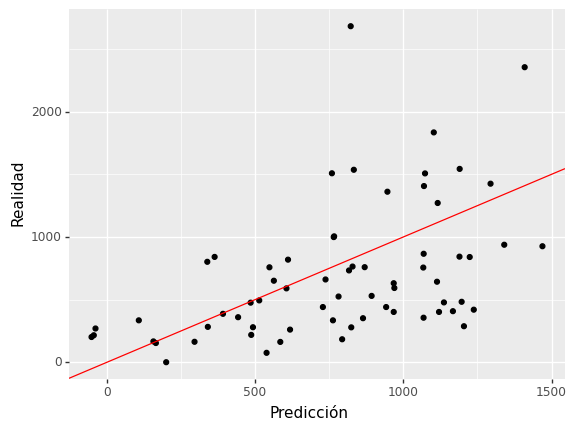

<ggplot: (127085277371)>

In [65]:
from plotnine import *

ggplot(aes(x= 'Predicción', y='Realidad'), allinfo) + geom_point() + geom_abline(slope = 1, color='red')

C:\Users\Paula Pareja\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 9'. Pick better value with 'binwidth'.


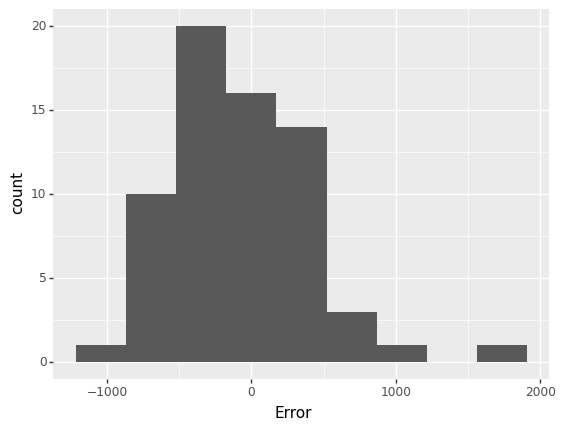

<ggplot: (127085277359)>

In [66]:
ggplot(aes(x='Error'), allinfo) + geom_histogram()

In [136]:
#Obtenemos los coeficientes de las variables predictoras: 
print('Coeficientes:', reg.coef_)
print(X.columns)

Coeficientes: [   5.58321415    5.72913676  -11.67175636 -226.95236978   23.61837419
 -190.12596882]
Index(['price', 'colour', 'location', 'page', 'model_photography', 'category'], dtype='object')


In [137]:
reg.intercept_

1568.699015781518

Esto quiere decir que las variables que influyeron más en el número de ventas fueron precio, color, y fotografía. Las demás tienen coeficientes negativos. Esto quiere decir que influyen negativamente, es decir, a medida que aumenta la variable predictora se espera que disminuya el valor de la variable objetivo. 

Debemos tener en cuenta que nuestras variables son categorías para la interpretación. Por ende las conclusiones son las siguientes: 
- Cuanto mayor es el precio, mayores son las ventas.
- Cuanto menor es el día mayores son las ventas. Esto se corresponde con el análisis anterior en el que identificamos que los primeros días del mes son en los que hay mayores ventas pues las personas han recibido el salario y hecho los gastos recurrentes y cuentan con mayor cantidad de dinero. 
- El mes también influye con menor intensidad, es decir que en abril y mayo hubo más ventas que en junio, julio o agosto. 
- El color puede ser interpretado dificilmente pues el número asociado a cada valor es aleatorio y hay 14 colores diferentes. Sin embargo, esto nos indica que hay una alta influencia del color en el número de ventas de manera positiva, siendo los números más altos como verde, rosa, rojo, violeta y blanco los más vendidos. 
- La localización tiene una influencia negativa, pues las posiciones 1,2,3 que son las superiores son las que tuvieron mayores ventas dada su visibilidad. 
- La página también influye negativamente pues cuanto menor es el número de página mayores ventas hay. 
- En el tipo de fotografía el modelo nos indica que hay una influencia positiva, sin embargo pudimos observar anteriormente que las ventas con fotografías de frente (1) fueron mayores que las de perfil (2). Esto tampoco tiene sentido. 
- Por último, la categoría de producto tiene un coeficiente negativo, y esto puede explicarse dentro del análisis previo. La categoría 1 es la más vendida, correspondiente a pantalones. La categoría 4, de productos en rebajas, es la que tiene un número menor de ventas. 

[Text(0.5, 1.0, 'Ventas según color')]

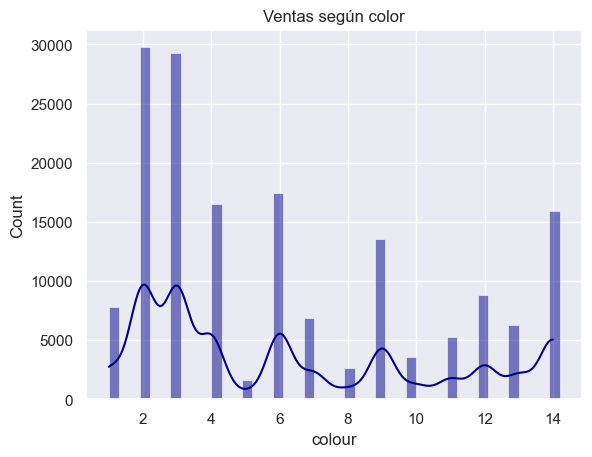

In [138]:
sns.histplot(data=df, x='colour',color='darkblue', kde=True, bins=15, binwidth= 0.3, linewidth=0.4).set(title='Ventas según color')

Parece que en este caso el modelo no predice correctamente la influencia de color en ventas, pues hay más ventas de los números más bajos. Asímismo la variable model_photography no corresponde al análisis realizado con anterioridad. Teniendo en cuenta que las variables son realmente categóricas y que esto puede comprometer las distancias para el modelo de regresión, vamos a convertilas en tipo object, quedarnos con las esenciales, convertir las gategóricas en boleanas con "get_dummies" y escalar las numéricas a valores entre 0 y 1.  

In [139]:
producto

,clothing_code,price,colour,location,page,model_photography,category,num_ventas
1,A1,28,8,1,1,1,1,2265
2,A10,38,3,4,1,1,1,2280
3,A11,62,3,4,1,1,1,2789
4,A12,38,2,4,1,1,1,2010
5,A13,28,1,5,1,1,1,1577
...,...,...,...,...,...,...,...,...
213,P8,28,2,3,1,1,4,661
214,P80,28,7,3,5,1,4,222
215,P81,43,4,3,5,2,4,202
216,P82,48,6,4,5,2,4,725


In [188]:
#Dividimos el dataset en variables categóricas y numéricas
productocat = producto[['clothing_code','colour', 'location','page','model_photography','category']]
productonum = producto[['clothing_code','price','num_ventas']]

#Cambiamos el tipo de dato de numérico a categórico (object)
productocat[['colour', 'location','page','model_photography','category']] = productocat[['colour', 'location','page','model_photography','category']].applymap(str)


C:\Users\Paula Pareja\AppData\Local\Temp\ipykernel_3368\642633524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [153]:
productocat.dtypes

clothing_code        object
colour               object
location             object
page                 object
model_photography    object
category             object
dtype: object

In [189]:
#Transformamos el dataframe
dummydf = pd.get_dummies(productocat, columns=['colour', 'location', 'page','model_photography','category'])


In [190]:
dummydf

,clothing_code,colour_1,colour_10,colour_11,colour_12,colour_13,colour_14,colour_2,colour_3,colour_4,...,page_2,page_3,page_4,page_5,model_photography_1,model_photography_2,category_1,category_2,category_3,category_4
1,A1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,A10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,A11,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,A12,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
5,A13,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,P8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
214,P80,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
215,P81,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
216,P82,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
productonum.loc[:, ['price']] = scaler.fit_transform(productonum.loc[:, ['price']])

C:\Users\Paula Pareja\AppData\Local\Temp\ipykernel_3368\2761857015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [192]:
productonum

,clothing_code,price,num_ventas
1,A1,0.156250,2265
2,A10,0.312500,2280
3,A11,0.687500,2789
4,A12,0.312500,2010
5,A13,0.156250,1577
...,...,...,...
213,P8,0.156250,661
214,P80,0.156250,222
215,P81,0.390625,202
216,P82,0.468750,725


In [193]:
#Unimos los dos df con código de producto en común para aplicar el modelo
dfmodeloReg = pd.merge(productonum, dummydf, on='clothing_code', how='inner')
dfmodeloReg

,clothing_code,price,num_ventas,colour_1,colour_10,colour_11,colour_12,colour_13,colour_14,colour_2,...,page_2,page_3,page_4,page_5,model_photography_1,model_photography_2,category_1,category_2,category_3,category_4
0,A1,0.156250,2265,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,A10,0.312500,2280,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,A11,0.687500,2789,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,A12,0.312500,2010,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,A13,0.156250,1577,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,P8,0.156250,661,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
213,P80,0.156250,222,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
214,P81,0.390625,202,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
215,P82,0.468750,725,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [194]:
#Dividimos nuestro dataset en conjuntos de entrenamiento y prueba del modelo usando la función train_test_split de scikit-learn:

#En la x vamos a seleccionar todas las variables menos el código de producto y la V.O. En la y seleccionamos la V.O. 
X = dfmodeloReg.drop(['clothing_code','num_ventas'], axis=1)
y = dfmodeloReg['num_ventas']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [196]:
#Entrenamos el modelo con el dataset de entrenamiento
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [197]:
#Realizamos las predicciones
y_pred = reg.predict(X_test)

In [198]:
y_pred

array([ 664.,  -64., 1000.,  260.,  768.,  290.,  556., 1248.,  164.,
       1036.,  308.,  904.,  872., 1376.,  892.,  592.,  272.,  536.,
         72.,  768.,  368., 1124., 1388.,  892.,  200., 1420.,  312.,
        716., 1470.,  412.,  596.,  720.,  508.,    4.,  516.,  536.,
       1214., 1444.,  522., 1114.,  394.,  604.,  412.,   58., 1222.,
        542.,  980.,  680.,  324.,  100.,  -16., 1872., 1040.,  108.,
       1406.,  740., 1040.,  594.,  524.,  528.,  850., 2116., 1048.,
        644.,  360.,  -24.])

In [201]:
#A continuación, evaluamos al modelo con diferentes métricas como MSE y el coeficiente de determinación: 
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

MAE: 348.8787878787879
MSE: 184789.81818181818
R^2: 0.3382250683727276


- El MAE muestra que el modelo se equivoca en unas 348 ventas.
- El MSE (184789) indica que las predicciones tienen un error cuadrático más bajo que antes.
- El valor del coeficiente de determinación R² es de 0.3382, ha mejorado pero aún sigue siendo muy bajo.

In [202]:
#Obtenemos los coeficientes de las variables predictoras: 
print('Coeficientes:', reg.coef_)
print(X.columns)

Coeficientes: [ 1.58863807e+02 -5.50007965e+14 -5.50007965e+14 -5.50007965e+14
 -5.50007965e+14 -5.50007965e+14 -5.50007965e+14 -5.50007965e+14
 -5.50007965e+14 -5.50007965e+14 -5.50007965e+14 -5.50007965e+14
 -5.50007965e+14 -5.50007965e+14 -5.50007965e+14  6.34109587e+14
  6.34109587e+14  6.34109587e+14  6.34109587e+14  6.34109587e+14
  6.34109587e+14  1.84796988e+14  1.84796988e+14  1.84796988e+14
  1.84796988e+14  1.84796988e+14  1.25406433e+16  1.25406433e+16
  3.63136420e+15  3.63136420e+15  3.63136420e+15  3.63136420e+15]
Index(['price', 'colour_1', 'colour_10', 'colour_11', 'colour_12', 'colour_13',
       'colour_14', 'colour_2', 'colour_3', 'colour_4', 'colour_5', 'colour_6',
       'colour_7', 'colour_8', 'colour_9', 'location_1', 'location_2',
       'location_3', 'location_4', 'location_5', 'location_6', 'page_1',
       'page_2', 'page_3', 'page_4', 'page_5', 'model_photography_1',
       'model_photography_2', 'category_1', 'category_2', 'category_3',
       'category_4'

Ahora los resultados del modelo indican que: 
- Las variables de precio y páginas son las que más influyen. Sin embargo, no funciona bien ya que considera que todas las páginas influyen igual en el número de venta y sabemos que en la página 1 se vendieron muchos más productos. 
- Considera que todas las categorías dentro de las variables influyen igual. 

Como los resultados de este modelo según el MSE y el R^2 son muy bajos, vamos a probar con un arbol de regresión. 

## 2.2. Árbol de regresión

In [177]:
#Importamos las librerías
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [410]:
producto

,clothing_code,price,day,month,colour,location,page,model_photography,category,num_ventas
1,A1,28,1,4,8,1,1,1,1,2265
2,A10,38,1,4,3,4,1,1,1,2280
3,A11,62,1,4,3,4,1,1,1,2789
4,A12,38,1,4,2,4,1,1,1,2010
5,A13,28,1,4,1,5,1,1,1,1577
...,...,...,...,...,...,...,...,...,...,...
213,P8,28,1,4,2,3,1,1,4,661
214,P80,28,1,4,7,3,5,1,4,222
215,P81,43,1,4,4,3,5,2,4,202
216,P82,48,1,4,6,4,5,2,4,725


In [411]:
#Dividimos el dataset en train y test 
X = producto.drop(['clothing_code','num_ventas'], axis=1)
y = producto['num_ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [412]:
#Creamos el modelo y asignamos la máxima profundidad del arbol en 5, lo cual podremos modidicar para ajustar el modelo
tree = DecisionTreeRegressor(max_depth=4, random_state=42)

In [413]:
#Entrenamos el modelo 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [414]:
#Creamos las predicciones
y_pred = tree.predict(X_test)

In [427]:
#Evaluamos al modelo 
MAE = mean_absolute_error(y_test, y_pred) 
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", MAE)
print("MSE:", MSE)
print("R^2:", r2)

MAE: 312.957634032634
MSE: 187053.35078250963
R^2: 0.28364405151459005


Los resultados en este modelo son mejores que los anteriores, aunque aún bastante mejorables.
- El error medio absoluto indica que el modelo tiene una posible desviación de 312 ventas al hacer las predicciones. 

In [428]:
allinfo = pd.DataFrame(columns=['Realidad', 'Predicción'])
allinfo['Realidad'] = y_test.copy()
allinfo['Predicción'] = y_pred.copy()
allinfo['Error'] = allinfo.Realidad - allinfo.Predicción
allinfo.head(6)

,Realidad,Predicción,Error
206,216,360.777778,-144.777778
215,202,360.777778,-158.777778
139,999,799.333333,199.666667
178,841,360.777778,480.222222
16,408,514.804878,-106.804878
112,758,678.500000,79.500000


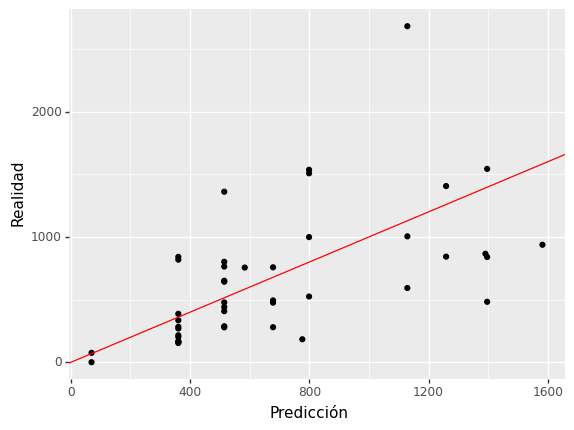

<ggplot: (119655342424)>

In [429]:
ggplot(aes(x= 'Predicción', y='Realidad'), allinfo) + geom_point() + geom_abline(slope = 1, color='red')

C:\Users\Paula Pareja\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.


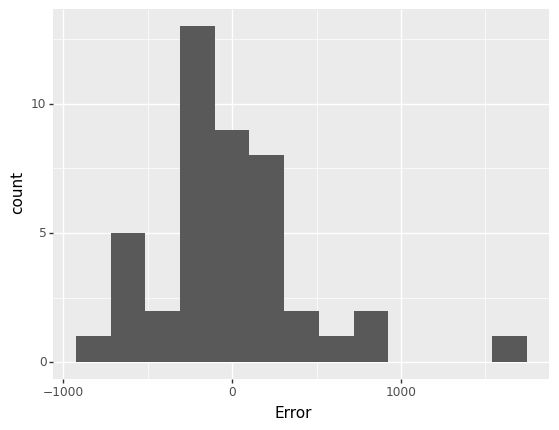

<ggplot: (119655372385)>

In [430]:
ggplot(aes(x='Error'), allinfo) + geom_histogram()

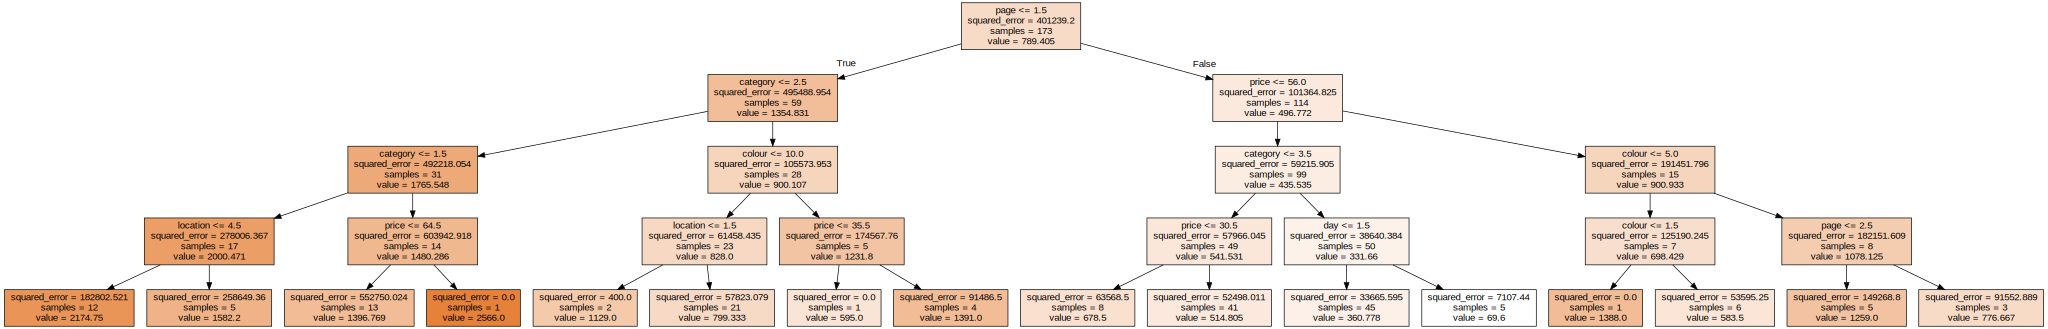

In [458]:
import graphviz
dot_data = export_graphviz(tree, out_file =None, feature_names=X.columns, filled=True)
graph = graphviz.Source(dot_data)
graph

In [459]:
#Exporto la gráfica como imagen para poder visualizarla mejor

graph.render('tree', format='png')

'tree.png'

Podemos sacar las siguientes conclusiones del arbol de regresión: 
- La variable que más influye según este modelo es página. Depués precio y categoría. 
- Podemos ver que en la página 1 se encuentran los productos con mayores ventas, en especial un producto que se vendió 2566 unidades, el cual era de la categoría 2 y tenía mayor precio de 64 dólares. 
- Deno de l la página 1 y la categoría 1 también se encuentran productos con mayores ventas. 
- Por el contrario, los productos con menores ventas se encuentran en la página 2,3,4 o 5, tienen un precio menor de 56 dólares y pertenecen a la categoría 4 (productos en rebajas). 

El arbol de regresión nos ha permitido identificar cuáles son las variables que tienen un mayor impacto en las ventas de los productos. Nos ha desvelado que cuanto mayor es el precio del producto mayores son las ventas (por lo que hay posibilidad de optimizar los gastos en la empresa). Además nos permite visualizar de manera sencilla cómo afecta cada variable y cuáles han sido nuestras ventas. 

A continuación, pasamos a hacer el modelo con el df de categóricas y numéricas escaladas (dfmodeloReg):

In [203]:
#Dividimos el dataset en train y test 
X = dfmodeloReg.drop(['clothing_code','num_ventas'], axis=1)
y = dfmodeloReg['num_ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [204]:
#Creamos el modelo y asignamos la máxima profundidad del arbol en 5, lo cual podremos modidicar para ajustar el modelo
tree = DecisionTreeRegressor(max_depth=4, random_state=42)

In [205]:
#Entrenamos el modelo 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [206]:
#Creamos las predicciones
y_pred = tree.predict(X_test)

In [207]:
#Evaluamos al modelo 
MAE = mean_absolute_error(y_test, y_pred) 
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", MAE)
print("MSE:", MSE)
print("R^2:", r2)

MAE: 295.60379593810444
MSE: 173911.04646484938
R^2: 0.3339749749403239


Los resultados en este modelo son mejores que los anteriores, aunque aún bastante mejorables.
- El error medio absoluto indica que el modelo tiene una posible desviación de 312 ventas al hacer las predicciones. 

Voy a eliminar la variable color para ver si así mejora el modelo

In [208]:
#Dividimos el dataset en variables categóricas y numéricas
productocat1 = producto[['clothing_code','location','page','model_photography','category']]
productonum1 = producto[['clothing_code','price','num_ventas']]

#Cambiamos el tipo de dato de numérico a categórico (object)
productocat1[['location','page','model_photography','category']] = productocat1[['location','page','model_photography','category']].applymap(str)


C:\Users\Paula Pareja\AppData\Local\Temp\ipykernel_3368\1664466500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [209]:
#Transformamos el dataframe
dummydf = pd.get_dummies(productocat1, columns=['location', 'page','model_photography','category'])


In [210]:
dummydf

,clothing_code,location_1,location_2,location_3,location_4,location_5,location_6,page_1,page_2,page_3,page_4,page_5,model_photography_1,model_photography_2,category_1,category_2,category_3,category_4
1,A1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,A10,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
3,A11,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,A12,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
5,A13,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,P8,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
214,P80,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1
215,P81,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
216,P82,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1


In [211]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
productonum.loc[:, ['price']] = scaler.fit_transform(productonum.loc[:, ['price']])

C:\Users\Paula Pareja\AppData\Local\Temp\ipykernel_3368\2761857015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [212]:
productonum

,clothing_code,price,num_ventas
1,A1,0.156250,2265
2,A10,0.312500,2280
3,A11,0.687500,2789
4,A12,0.312500,2010
5,A13,0.156250,1577
...,...,...,...
213,P8,0.156250,661
214,P80,0.156250,222
215,P81,0.390625,202
216,P82,0.468750,725


In [213]:
#Unimos los dos df con código de producto en común para aplicar el modelo
dfmodeloReg = pd.merge(productonum, dummydf, on='clothing_code', how='inner')
dfmodeloReg

,clothing_code,price,num_ventas,location_1,location_2,location_3,location_4,location_5,location_6,page_1,page_2,page_3,page_4,page_5,model_photography_1,model_photography_2,category_1,category_2,category_3,category_4
0,A1,0.156250,2265,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,A10,0.312500,2280,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
2,A11,0.687500,2789,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
3,A12,0.312500,2010,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,A13,0.156250,1577,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,P8,0.156250,661,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
213,P80,0.156250,222,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1
214,P81,0.390625,202,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
215,P82,0.468750,725,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1


In [215]:
#Dividimos el dataset en train y test 
X = dfmodeloReg.drop(['clothing_code','num_ventas'], axis=1)
y = dfmodeloReg['num_ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [216]:
#Creamos el modelo y asignamos la máxima profundidad del arbol en 5, lo cual podremos modidicar para ajustar el modelo
tree = DecisionTreeRegressor(max_depth=4, random_state=42)

In [217]:
#Entrenamos el modelo 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [218]:
#Creamos las predicciones
y_pred = tree.predict(X_test)

In [219]:
#Evaluamos al modelo 
MAE = mean_absolute_error(y_test, y_pred) 
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", MAE)
print("MSE:", MSE)
print("R^2:", r2)

MAE: 297.47758680713235
MSE: 171740.14780511992
R^2: 0.3422888392039177


Los resultados mejoran un poco pero aún así siguen siendo muy bajos. El modelo necesitaría más datos para funcionar correctamente.

## 2.3. Clusterización

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [68]:
#Dividimos el dataset en variables categóricas y numéricas
productocat = producto[['clothing_code','colour', 'location','page','model_photography','category']]
productonum = producto[['clothing_code','price','num_ventas']]

#Cambiamos el tipo de dato de numérico a categórico (object)
productocat[['colour', 'location','page','model_photography','category']] = productocat[['colour', 'location','page','model_photography','category']].applymap(str)


C:\Users\Paula Pareja\AppData\Local\Temp\ipykernel_6548\642633524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [69]:
productocat.dtypes

clothing_code        object
colour               object
location             object
page                 object
model_photography    object
category             object
dtype: object

In [81]:
#Transformamos el dataframe
dummydf = pd.get_dummies(productocat, columns=['colour', 'location', 'page','model_photography','category'])


In [82]:
dummydf

,clothing_code,colour_1,colour_10,colour_11,colour_12,colour_13,colour_14,colour_2,colour_3,colour_4,...,page_2,page_3,page_4,page_5,model_photography_1,model_photography_2,category_1,category_2,category_3,category_4
1,A1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,A10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,A11,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,A12,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
5,A13,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,P8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
214,P80,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
215,P81,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
216,P82,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
productonum.loc[:, ['price','num_ventas']] = scaler.fit_transform(productonum.loc[:, ['price','num_ventas']])

C:\Users\Paula Pareja\AppData\Local\Temp\ipykernel_6548\369061271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [84]:
productonum

,clothing_code,price,num_ventas
1,A1,0.156250,0.632756
2,A10,0.312500,0.636948
3,A11,0.687500,0.779206
4,A12,0.312500,0.561487
5,A13,0.156250,0.440470
...,...,...,...
213,P8,0.156250,0.184461
214,P80,0.156250,0.061766
215,P81,0.390625,0.056177
216,P82,0.468750,0.202348


In [85]:
#Unimos los dos df con código de producto en común para aplicar el modelo
dfcluster = pd.merge(productonum, dummydf, on='clothing_code', how='inner')
dfcluster

,clothing_code,price,num_ventas,colour_1,colour_10,colour_11,colour_12,colour_13,colour_14,colour_2,...,page_2,page_3,page_4,page_5,model_photography_1,model_photography_2,category_1,category_2,category_3,category_4
0,A1,0.156250,0.632756,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,A10,0.312500,0.636948,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,A11,0.687500,0.779206,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,A12,0.312500,0.561487,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,A13,0.156250,0.440470,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,P8,0.156250,0.184461,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
213,P80,0.156250,0.061766,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
214,P81,0.390625,0.056177,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
215,P82,0.468750,0.202348,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [86]:
dfcluster = dfcluster.drop(columns=['clothing_code'])
dfcluster

,price,num_ventas,colour_1,colour_10,colour_11,colour_12,colour_13,colour_14,colour_2,colour_3,...,page_2,page_3,page_4,page_5,model_photography_1,model_photography_2,category_1,category_2,category_3,category_4
0,0.156250,0.632756,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0.312500,0.636948,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
2,0.687500,0.779206,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,0.312500,0.561487,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0.156250,0.440470,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.156250,0.184461,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
213,0.156250,0.061766,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
214,0.390625,0.056177,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
215,0.468750,0.202348,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [87]:
#Importamos las librerías necesarias
#!pip install kmodes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes


In [88]:
dfcluster.dtypes

price                  float64
num_ventas             float64
colour_1                 uint8
colour_10                uint8
colour_11                uint8
colour_12                uint8
colour_13                uint8
colour_14                uint8
colour_2                 uint8
colour_3                 uint8
colour_4                 uint8
colour_5                 uint8
colour_6                 uint8
colour_7                 uint8
colour_8                 uint8
colour_9                 uint8
location_1               uint8
location_2               uint8
location_3               uint8
location_4               uint8
location_5               uint8
location_6               uint8
page_1                   uint8
page_2                   uint8
page_3                   uint8
page_4                   uint8
page_5                   uint8
model_photography_1      uint8
model_photography_2      uint8
category_1               uint8
category_2               uint8
category_3               uint8
category

In [89]:
#Buscamos el número óptimo de clusters

silhouette_scores = []
for n_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(dfcluster)
    score = silhouette_score(dfcluster, kmeans.labels_)
    silhouette_scores.append(score)

In [90]:
score

0.12291449461532558

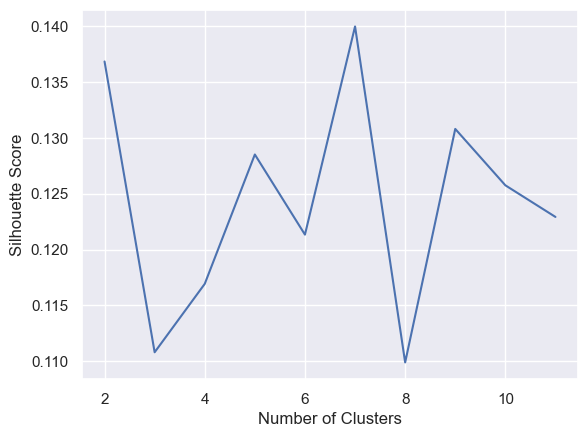

In [253]:
plt.plot(range(2, 12), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

El número de clusters óptimos es 7. 

In [91]:
kmeans = KMeans(n_clusters=7, random_state=42)

In [92]:
# fit the model on the data
kmeans.fit(dfcluster)

# get predicted cluster labels for each sample in the data
labels = kmeans.predict(dfcluster)

In [93]:
labels

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       5, 5, 5, 2, 5, 5, 5, 2, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 3, 5, 5, 2, 5, 5, 2, 5, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4,
       4, 2, 4, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0,
       6, 6, 6, 0, 0, 6, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 0, 0,
       0, 6, 0, 0, 6, 0, 6, 6, 6, 6, 0, 0, 6, 6, 0, 0, 6, 6, 6, 6, 6, 6,
       0, 6, 0, 2, 6, 6, 0, 6, 6, 0, 6, 0, 6, 0, 0, 0, 6, 6, 2])

In [94]:
for i in range(7):
    print("Cluster ", i, ": ", dfcluster[labels == i])

Cluster  0 :          price  num_ventas  colour_1  colour_10  colour_11  colour_12  \
135  0.312500    0.749022         0          0          0          0   
138  0.234375    0.278927         0          0          0          0   
139  0.312500    0.146451         0          0          0          0   
142  0.234375    0.421185         0          0          0          0   
144  0.156250    0.159027         0          0          0          0   
145  0.468750    0.109558         0          0          0          0   
146  0.156250    0.280604         0          0          0          0   
147  0.078125    0.184740         0          0          0          0   
148  0.234375    0.082728         0          0          0          0   
149  0.531250    0.000279         0          0          0          1   
151  0.390625    0.037451         0          0          0          0   
153  0.390625    0.164617         0          0          0          0   
157  0.468750    0.320850         0          0    

In [95]:
# Agregar la columna de clusters al conjunto de datos
producto['cluster'] = kmeans.labels_
producto

,clothing_code,price,colour,location,page,model_photography,category,num_ventas,cluster
1,A1,28,8,1,1,1,1,2265,1
2,A10,38,3,4,1,1,1,2280,1
3,A11,62,3,4,1,1,1,2789,1
4,A12,38,2,4,1,1,1,2010,1
5,A13,28,1,5,1,1,1,1577,1
...,...,...,...,...,...,...,...,...,...
213,P8,28,2,3,1,1,4,661,0
214,P80,28,7,3,5,1,4,222,0
215,P81,43,4,3,5,2,4,202,6
216,P82,48,6,4,5,2,4,725,6


In [100]:
producto.groupby('cluster').mean()

,price,colour,location,page,model_photography,category,num_ventas
cluster,,,,,,,
0,36.325000,6.350000,2.975000,2.550000,1.0,4.000000,563.350000
1,47.588235,2.911765,3.235294,1.705882,1.0,1.000000,1195.676471
2,41.411765,5.588235,3.647059,1.000000,2.0,2.882353,1105.647059
3,37.608696,7.260870,2.913043,2.565217,2.0,2.347826,590.826087
4,41.902439,9.317073,3.585366,2.024390,1.0,3.000000,657.536585
5,50.407407,6.481481,3.185185,1.555556,1.0,2.000000,1196.037037
6,36.142857,7.457143,3.428571,3.485714,2.0,4.000000,304.285714


In [102]:
producto.groupby('cluster')['cluster'].count()

cluster
0    40
1    34
2    17
3    23
4    41
5    27
6    35
Name: cluster, dtype: int64

C:\Users\Paula Pareja\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
C:\Users\Paula Pareja\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.


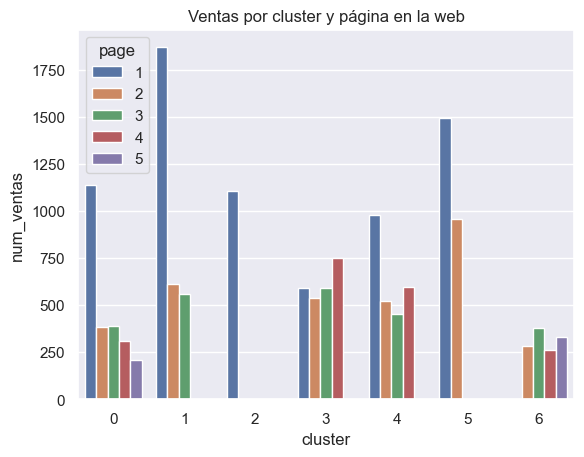

In [127]:
ax = sns.barplot(x='cluster', y='num_ventas', data=producto, hue='page', palette='deep',ci=None)
ax.set(title='Ventas por cluster y página en la web');

C:\Users\Paula Pareja\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
C:\Users\Paula Pareja\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.


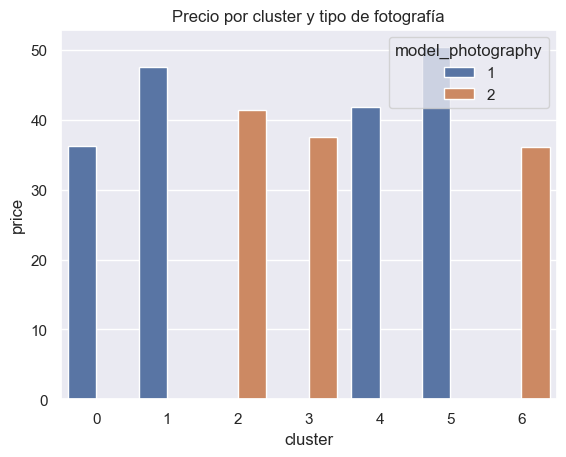

In [126]:
ax = sns.barplot(x='cluster', y='price', hue='model_photography',data=producto, palette='deep',ci=None)
ax.set(title='Precio por cluster y tipo de fotografía');

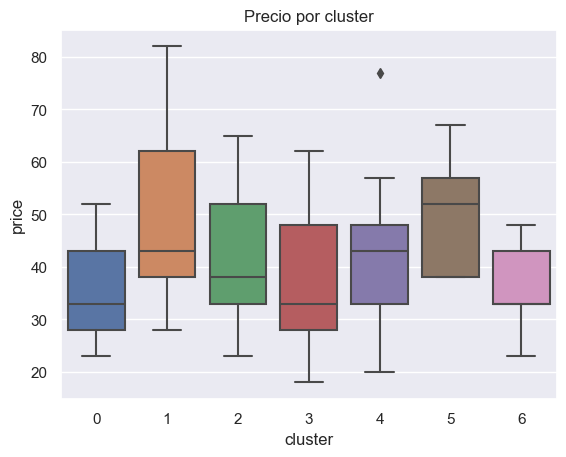

In [125]:
sns.boxplot( x=producto["cluster"], y=producto["price"]).set(title='Precio por cluster');

C:\Users\Paula Pareja\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
C:\Users\Paula Pareja\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.


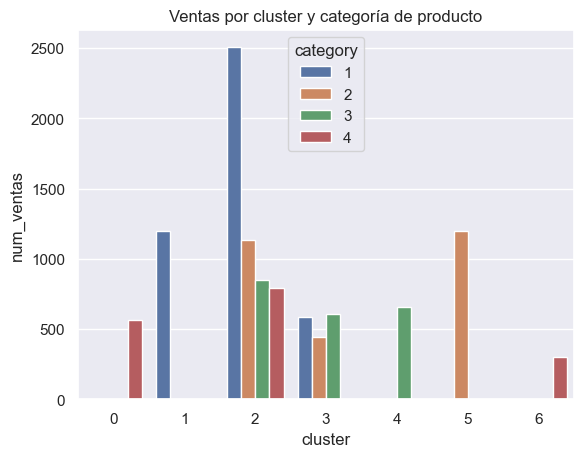

In [142]:
ax = sns.barplot(x='cluster', y='num_ventas', data=producto, hue='category', palette='deep',ci=None)
ax.set(title='Ventas por cluster y categoría de producto');

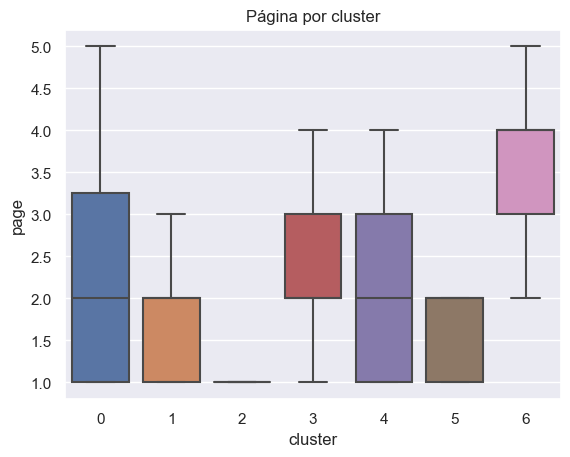

In [143]:
sns.boxplot( x=producto["cluster"], y=producto["page"]).set(title='Página por cluster');

Conclusiones clusters: 
- El número óptimo de clusters es 7.
- Hay cuatro clusters más relevantes por su mayor o menor número de ventas

Cluster 1:
- El cluster número 1 es el que tiene mayores ventas, coincide con los precios más altos, productos de la categoría "pantalones", cuyas fotografías son de frente y se encuentran principalmente en la página 1. 

Cluster 2: 
- El cluster número 2 también tiene altas ventas, sin embargo es un grupo más especial. Sus productos son más variados (pantalones, faldas y blusas), se encuentran en todas las páginas menos la 5 y tiene fotografías de perfil. 

Cluster 5: 
- Cluster con altas ventas, principalmente son faldas con precios más altos en las páginas 1 y 2 de la web. 

Cluster 6:
- Son los precios con menores ventas, se localizan en la página 5 y corresponden a productos en rebaja. La mayoría de las fotografías son de perfil. 

Ante estos datos, la marca sabría que los productos con precios más altos tienen mayores ventas, debe focalizarse en la venta de pantalones y faldas y mejorar la estructura de la web ya que las páginas 3, 4, y 5 no funcionan bien (habría que estudiar la estructura así como la experiencia de usuario). Asímismo, las fotografías de frente venden mucho más así que deberían potenciarse más y dejar las fotografías de perfil para ciertos productos determinados o secciones de la web con otra finalidad que no sea la compra rápida. 

# CONCLUSIONES GENERALES

- PRECIOS
    - Se recomienda a la marca valorar la posibilidad de realizar una subida de precios, ya que los productos más vendidos corresponden a aquellos con precios más altos que los de su categoría. 
    - Deberá hacerse de manera progresiva, a través de campañas TEST A/B para analizar la reacción de los clientes ante los diferentes precios. 
    - Asímismo, se deberá realizar un análisis de mercado para valorar, entre otros, precios y productos de la competencia y la posibilidad de subir precios o no. 
    
- PRODUCTOS
    - Se recomienda centrarse en las categorías más vendidas y darle mayor visibilidad a estas en la web. 
    - A través del modelo de asociación realizado, se podrán recomendar productos al cliente que podrían interesarle antes de realizar la compra. 
    - Asimismo, se plantea la posibilidad de realizar descuentos por lote, crear una sección de "combinaciones" o similares donde los clientes puedan comprar sets de pantalones y camisetas que suelen comprarse en conjunto al ser complementarios. 
    - Para poder aumentar las ventas en otros países, se deberá llevar a cabo un estudio a través de buscadores de keywords para identificar huecos de mercado y poder adaptar el producto y la página web a la cultura del país y la demanda. 
   
- WEB
    - Se recomienda reestructurar la página web, localizar los productos más vendidos en la parte superior así como la división por categorías
    - Falta información necesaria para valorar la distribución actual de la web pero sí es cierto que las páginas 3, 4, y 5 tienen muchas menos ventas que la 1 y la 2.
    - Las imágenes de la web deberían adaptarse a la demanda, pues las fotografías de perfil tienen muchas menos ventas. 
    
    
En relación con los modelos, harían falta más datos para poder realizar regresiones de mayor calidad. Asímismo, como se mencionó anteriormente, con la recopilación de otros datos como ID del cliente podría llevarse a cabo un análisis en profundidad de tipos de clientes, frecuencia de compra y clusterización. Asímismo se podría hacer una recomendación según las compras del propio cliente, teniendo en cuenta variables como edad y sexo.